산업통상자원부 공모전(빅데이터 분석 과제4): https://datacontest.kr/apply/applyAdd/3  
기상청 종관기상관측(ASOS)자료: https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36  
한국전력거래소_5분단위 전력수급현황: https://www.data.go.kr/data/15099819/fileData.do  
기상관련Q&A: https://bd.kma.go.kr/contest/faq_view.do#

# 기상정보를 활용한 실시간 전력수요 예측모델 개발

##### ※ 본 프로젝트는 산업통상자원부에서 주최하는 2023년 제 11회 공공데이터 활용BI 공모전 빅데이터 분석 부문에 참여하면서 진행하였습니다.

- 프로젝트 주제: 기상정보를 활용한 실시간 전력수요 예측모델 개발  
- 분석 대상 기간: 23.3.13(월) ~ 23.3.19(일)(1주일)  
- 유의사항:
  1. 향후 6시간까지의 5분 단위 예측 모델 제시  
  2. MAPE(Mean Absolute Percentage Error)로 제시 
   - 제시한 예측모델을 실행하여 과거 수요 데이터로 검증한 예측실적치와 MAPE를 분석 대상 기간에 대해 제시

# EDA

## 1. 전력데이터 EDA

## 1) 전력데이터 불러오기 & 결합

* 전력수요량 추출을 위한 전력수급데이터 불러오기.    
* 공공데이터 포털에 한국전력거래소_5분단위 전력수급현황 데이터가 2개가 있음.
* 일시 기준으로 전력수급데이터가 2012.06.01 ~ 2022.04.07과 2022.04.01 ~ 2023.04.30로 나눠져 있음.  
* 둘다 불러온다.

In [1]:
import pandas as pd 
df_ps = pd.read_csv("한국전력거래소_5분단위 전력수급현황(20120601~20220407).csv",encoding='cp949')
df_ps

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2012-06-01 00:00,64355.0,51726.33,59400,12628.67,24.41439,12628.67,24.41439
1,2012-06-01 00:05,64355.0,51342.53,60800,13012.47,25.34442,13012.47,25.34442
2,2012-06-01 00:10,64355.0,51583.17,60800,12771.83,24.75969,12771.83,24.75969
3,2012-06-01 00:15,64355.0,51631.69,60800,12723.31,24.64245,12723.31,24.64245
4,2012-06-01 00:20,64355.0,51252.66,60800,13102.35,25.56423,13102.35,25.56423
...,...,...,...,...,...,...,...,...
1035062,2022-04-07 23:35,82791.9,63877.30,69300,18914.70,29.61100,10803.00,16.91210
1035063,2022-04-07 23:40,82768.1,63525.30,69300,19242.80,30.29160,10696.40,16.83800
1035064,2022-04-07 23:45,82767.9,63506.20,69300,19261.70,30.33040,10501.30,16.53580
1035065,2022-04-07 23:50,82762.4,62819.60,69300,19942.80,31.74610,10706.30,17.04290


In [2]:
df_ps2 = pd.read_csv("한국전력거래소_5분단위 전력수급현황(20220401~20230430).csv",encoding='cp949')
df_ps2

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2022-04-01 00:00,82494.25,62453.29,70100,20040.96,32.08951,9257.45,14.82300
1,2022-04-01 00:05,83807.25,62329.25,70700,21477.99,34.45893,10889.28,17.47058
2,2022-04-01 00:10,83799.12,61830.96,70700,21968.15,35.52937,10865.86,17.57350
3,2022-04-01 00:15,83790.42,61648.72,70700,22141.69,35.91589,10864.26,17.62284
4,2022-04-01 00:20,83770.82,61382.62,70700,22388.19,36.47318,10451.95,17.02754
...,...,...,...,...,...,...,...,...
113638,2023-04-30 23:35,76101.03,53828.62,57300,22272.40,41.37651,9389.09,17.44257
113639,2023-04-30 23:40,76084.24,53693.20,57300,22391.04,41.70181,8897.85,16.57166
113640,2023-04-30 23:45,76083.32,52937.98,57300,23145.34,43.72161,9257.95,17.48829
113641,2023-04-30 23:50,76077.47,52679.85,57300,23397.62,44.41474,9303.84,17.66110


* 기간이 겹치는 부분이 있음(2022-04-01 ~ 2022-04-07) 
* 해당범위 일시 데이터를 각각 불러와서 비교   


In [3]:
# 첫번째 자료 2022-04-01 ~ 2022-04-07 데이터

# 기준일시를 날짜형식으로 변환
df_ps['기준일시'] = pd.to_datetime(df_ps['기준일시'])

# 2022-04-01부터 2022-04-07 23:55:00까지의 값을 찾기
start_date = pd.to_datetime('2022-04-01')
end_date = pd.to_datetime('2022-04-07 23:55:00')
df_ps_filtered = df_ps[(df_ps['기준일시'] >= start_date) & (df_ps['기준일시'] <= end_date)]
df_ps_filtered

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
1033176,2022-04-01 00:00:00,82494.3,62453.3,70100,20041.0,32.0895,9257.46,14.8230
1033177,2022-04-01 00:05:00,83807.2,62329.3,70700,21478.0,34.4589,10889.30,17.4706
1033178,2022-04-01 00:10:00,83799.1,61831.0,70700,21968.2,35.5294,10865.90,17.5735
1033179,2022-04-01 00:15:00,83790.4,61648.7,70700,22141.7,35.9159,10864.30,17.6228
1033180,2022-04-01 00:20:00,83770.8,61382.6,70700,22388.2,36.4732,10452.00,17.0275
...,...,...,...,...,...,...,...,...
1035062,2022-04-07 23:35:00,82791.9,63877.3,69300,18914.7,29.6110,10803.00,16.9121
1035063,2022-04-07 23:40:00,82768.1,63525.3,69300,19242.8,30.2916,10696.40,16.8380
1035064,2022-04-07 23:45:00,82767.9,63506.2,69300,19261.7,30.3304,10501.30,16.5358
1035065,2022-04-07 23:50:00,82762.4,62819.6,69300,19942.8,31.7461,10706.30,17.0429


In [4]:
# 두번째 자료 2022-04-01 ~ 2022-04-07 데이터

# 기준일시를 날짜형식으로 변환
df_ps2['기준일시'] = pd.to_datetime(df_ps2['기준일시'])

# 2022-04-01부터 2022-04-07 23:55:00까지의 값을 찾기
start_date = pd.to_datetime('2022-04-01')
end_date = pd.to_datetime('2022-04-07 23:55:00')
df_ps_filtered2 = df_ps2[(df_ps2['기준일시'] >= start_date) & (df_ps2['기준일시'] <= end_date)]
df_ps_filtered2

,기준일시,공급능력(MW),현재수요(MW),최대예측수요(MW),공급예비력(MW),공급예비율(퍼센트),운영예비력(MW),운영예비율(퍼센트)
0,2022-04-01 00:00:00,82494.25,62453.29,70100,20040.96,32.08951,9257.45,14.82300
1,2022-04-01 00:05:00,83807.25,62329.25,70700,21477.99,34.45893,10889.28,17.47058
2,2022-04-01 00:10:00,83799.12,61830.96,70700,21968.15,35.52937,10865.86,17.57350
3,2022-04-01 00:15:00,83790.42,61648.72,70700,22141.69,35.91589,10864.26,17.62284
4,2022-04-01 00:20:00,83770.82,61382.62,70700,22388.19,36.47318,10451.95,17.02754
...,...,...,...,...,...,...,...,...
2009,2022-04-07 23:35:00,82791.92,63877.26,69300,18914.66,29.61095,10802.99,16.91210
2010,2022-04-07 23:40:00,82768.10,63525.30,69300,19242.80,30.29156,10696.36,16.83795
2011,2022-04-07 23:45:00,82767.92,63506.23,69300,19261.68,30.33039,10501.27,16.53581
2012,2022-04-07 23:50:00,82762.37,62819.60,69300,19942.77,31.74610,10706.29,17.04291


In [5]:
# 데이터 크기 비교 
print(df_ps_filtered.shape)
print(df_ps_filtered2.shape)

(1891, 8)
(2014, 8)


* 데이터 크기가 다름.
* 첫번째 자료에 결측값이 있어보임. 
* 필요한 자료가 현재수요 칼럼이므로 이 열을 기준으로 확인.

In [6]:
# 데이터프레임 병합
merged = pd.merge(df_ps_filtered, df_ps_filtered2, on='기준일시', how='outer')

# 기준일시가 있는 행과 없는 행 구분
missing_rows_df1 = merged[merged['현재수요(MW)_x'].notnull() & merged['현재수요(MW)_y'].isnull()]  # 첫번째 데이터에만 있는 행
missing_rows_df2 = merged[merged['현재수요(MW)_x'].isnull() & merged['현재수요(MW)_y'].notnull()]  # 두번째 데이터에만 있는 행

# 결과 출력
print("첫번째 데이터에만 있는 행(현재수요 기준):")
missing_rows_df1[['기준일시','현재수요(MW)_x','현재수요(MW)_y']]
print("두번째 데이터에만 있는 행(현재수요 기준):")
missing_rows_df2[['기준일시','현재수요(MW)_x','현재수요(MW)_y']]

첫번째 데이터에만 있는 행(현재수요 기준):
두번째 데이터에만 있는 행(현재수요 기준):


,기준일시,현재수요(MW)_x,현재수요(MW)_y
1891,2022-04-06 13:45:00,NaN,59939.30
1892,2022-04-06 13:50:00,NaN,60169.38
1893,2022-04-06 13:55:00,NaN,60086.69
1894,2022-04-06 14:00:00,NaN,60246.37
1895,2022-04-06 14:05:00,NaN,59972.00
...,...,...,...
2009,2022-04-06 23:35:00,NaN,63386.87
2010,2022-04-06 23:40:00,NaN,63392.59
2011,2022-04-06 23:45:00,NaN,63102.06
2012,2022-04-06 23:50:00,NaN,62452.65


* 확인결과 첫번째 자료에 결측값이 있고 두번째는 없었음.
* 결측값은 두번째 자료로 대체
* 나머지 겹치는 일시의 데이터들이 같은 값을 갖고 있는지 비교.

In [7]:
# 겹치는 일시 현재수요량 비교
existing_rows = merged[merged['현재수요(MW)_x'].notnull() & merged['현재수요(MW)_y'].notnull()] 
print("겹치는 일시의 행(현재수요 기준):")
existing_rows[['기준일시','현재수요(MW)_x','현재수요(MW)_y']]

겹치는 일시의 행(현재수요 기준):


,기준일시,현재수요(MW)_x,현재수요(MW)_y
0,2022-04-01 00:00:00,62453.3,62453.29
1,2022-04-01 00:05:00,62329.3,62329.25
2,2022-04-01 00:10:00,61831.0,61830.96
3,2022-04-01 00:15:00,61648.7,61648.72
4,2022-04-01 00:20:00,61382.6,61382.62
...,...,...,...
1886,2022-04-07 23:35:00,63877.3,63877.26
1887,2022-04-07 23:40:00,63525.3,63525.30
1888,2022-04-07 23:45:00,63506.2,63506.23
1889,2022-04-07 23:50:00,62819.6,62819.60


* 소수점 단위로 차이가 있어 보임. 
* 첫번째 자료는 소수점 첫째자리까지 값이 있고 두번째 자료는 소수점 둘째자리까지 값이 있어서   
  첫째자리 기준으로 반올림하여 비교.
* 필요한 자료는 현재수요 칼럼이므로 이 칼럼 끼리만 비교

In [8]:
# 두번째 자료 현재수요값 반올림

from decimal import Decimal, ROUND_HALF_UP

def round_current_demand(x):
    if isinstance(x, (int, float)):  # 숫자형인지 확인
        x = Decimal(str(x)).quantize(Decimal('0.0'), rounding=ROUND_HALF_UP)  # 숫자형으로 변환 후 반올림
    return x

existing_rows['현재수요(MW)_y'] = existing_rows['현재수요(MW)_y'].apply(round_current_demand)
pd.DataFrame(existing_rows['현재수요(MW)_y'])

C:\Users\user\AppData\Local\Temp\ipykernel_12860\2319256527.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  existing_rows['현재수요(MW)_y'] = existing_rows['현재수요(MW)_y'].apply(round_current_demand)


,현재수요(MW)_y
0,62453.3
1,62329.3
2,61831.0
3,61648.7
4,61382.6
...,...
1886,63877.3
1887,63525.3
1888,63506.2
1889,62819.6


In [9]:
# 명시적인 숫자값 비교를 위해 문자형으로 변경
comp1 = existing_rows['현재수요(MW)_y'].astype(str)
comp2 = existing_rows['현재수요(MW)_x'].astype(str)

# 비교 
comparison = comp1 == comp2
value_counts = comparison.value_counts()
value_counts 

True     1870
False      21
dtype: int64

* 소수점 첫째자리까지 반올림 후 비교하니 21개 값이 다르다고 나왔다.
* 다시 값추출 후 비교

In [10]:
# 다른값 과 인덱스 찾기
false_indexes = comparison[comparison == False].index
false_values = comparison[comparison == False].values
extracted_rows = existing_rows.loc[false_indexes]
extracted_rows[['현재수요(MW)_x','현재수요(MW)_y']]

,현재수요(MW)_x,현재수요(MW)_y
202,66499.5,66499.6
266,66082.2,66082.3
690,48946.8,48946.7
741,44778.2,44778.3
874,55288.8,55288.7
934,57975.6,57975.5
1011,58633.1,58633.0
1064,65937.9,65937.8
1131,65520.9,65520.8
1161,59867.6,59867.5


* 소수점 단위로 차이가 있어보인다. 
* 차이가 0.1 이하면 비슷하다고 간주
* 계산해서 확인

In [11]:
import numpy as np

# 연산을 위해 데이터타입 변환
extracted_rows['현재수요(MW)_x'] = extracted_rows['현재수요(MW)_x'].astype(float)
extracted_rows['현재수요(MW)_y'] = extracted_rows['현재수요(MW)_y'].astype(float)

# 두 칼럼 간 차이 계산
diff = np.abs(extracted_rows['현재수요(MW)_x'] - extracted_rows['현재수요(MW)_y'])

# 차이 값이 1 이하인 경우 True, 1을 초과하는 경우 False로 설정
result = np.isclose(diff, 0.1, atol=1e-10)

# 결과 출력
false_count = len(result) - result.sum()
print(false_count)

0


* 다른 값은 전부 차이가 0.1 이하다. 
* 비슷하다고 판단하고 결측값이 없는 2번째 자료 기준으로 결합

In [12]:
# 기준일시, 현재수요 칼럼만 추출
df_cd = pd.DataFrame(df_ps[['기준일시','현재수요(MW)']])
df_cd2 = pd.DataFrame(df_ps2[['기준일시','현재수요(MW)']])

# 첫번째 데이터프레임을 기준으로 두 데이터프레임 합치기
merged = pd.merge(df_cd, df_cd2, on='기준일시', how='outer', suffixes=('_df1', '_df2'))

# 같은 값이 있는 경우 첫번째 데이터프레임의 값으로 채우기
merged['현재수요(MW)'] = merged['현재수요(MW)_df1'].combine_first(merged['현재수요(MW)_df2'])

# 기준일시 열과 불필요한 열 제거
merged.drop(['현재수요(MW)_df1', '현재수요(MW)_df2'], axis=1, inplace=True)

# 결과 출력
df_cd_merge = pd.DataFrame(merged)
df_cd_merge

,기준일시,현재수요(MW)
0,2012-06-01 00:00:00,51726.33
1,2012-06-01 00:05:00,51342.53
2,2012-06-01 00:10:00,51583.17
3,2012-06-01 00:15:00,51631.69
4,2012-06-01 00:20:00,51252.66
...,...,...
1146814,2023-04-30 23:35:00,53828.62
1146815,2023-04-30 23:40:00,53693.20
1146816,2023-04-30 23:45:00,52937.98
1146817,2023-04-30 23:50:00,52679.85


* 프로젝트의 목표는 23.03.13 ~ 23.03.19 기간의 전력수요량 예측.
* 과거 수요 데이터로 검증해야 됨. 
* 23.03.12 까지 데이터를 필터링.

In [13]:
# '기준일시' 열을 datetime 형식으로 변환
df_cd_merge['기준일시'] = pd.to_datetime(df_cd_merge['기준일시'])

# 2023년 3월 12일 까지 데이터 추출
ED = df_cd_merge[df_cd_merge['기준일시'] <= '2023-03-12 23:55:00']

# 결과 출력
ED.reset_index(drop=True, inplace=True)
ED

,기준일시,현재수요(MW)
0,2012-06-01 00:00:00,51726.33
1,2012-06-01 00:05:00,51342.53
2,2012-06-01 00:10:00,51583.17
3,2012-06-01 00:15:00,51631.69
4,2012-06-01 00:20:00,51252.66
...,...,...
1132716,2023-03-12 23:35:00,60235.18
1132717,2023-03-12 23:40:00,60106.61
1132718,2023-03-12 23:45:00,59725.49
1132719,2023-03-12 23:50:00,59485.58


In [14]:
ED.to_csv('5분단위_전력수요량(2012.06.01~2023.03.12).csv')

* 전력수요 데이터 추출 및 결합 끝.
* 데이터 탐색 시작

## 2) 전력수요 데이터 탐색 

In [15]:
# 데이터 크기
ED.shape

(1132721, 2)

In [16]:
# 데이터 정보
ED.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132721 entries, 0 to 1132720
Data columns (total 2 columns):
 #   Column    Non-Null Count    Dtype         
---  ------    --------------    -----         
 0   기준일시      1132721 non-null  datetime64[ns]
 1   현재수요(MW)  1132721 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 17.3 MB


In [17]:
# 결측값 확인
ED.isnull().sum()

기준일시        0
현재수요(MW)    0
dtype: int64

In [18]:
# 데이터 통계량
ED.describe()

,현재수요(MW)
count,1.132721e+06
mean,6.223265e+04
std,8.493437e+03
min,3.660735e+04
25%,5.593070e+04
50%,6.171463e+04
75%,6.752490e+04
max,9.485287e+04


## 3) 전력수요 데이터 시각화

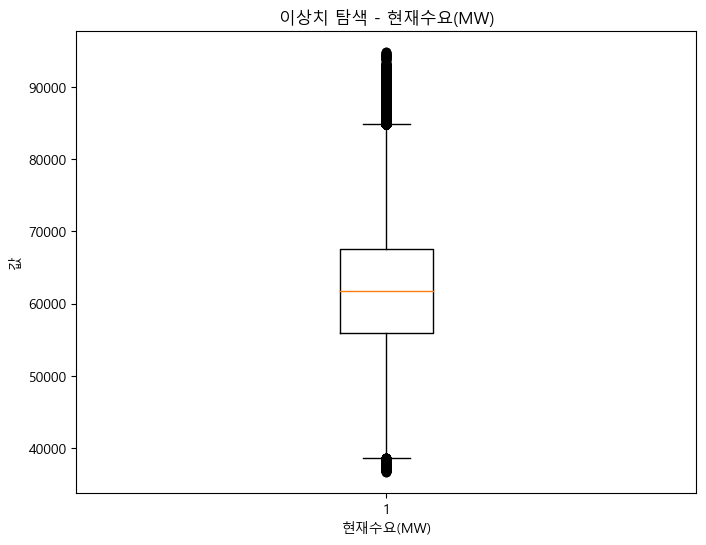

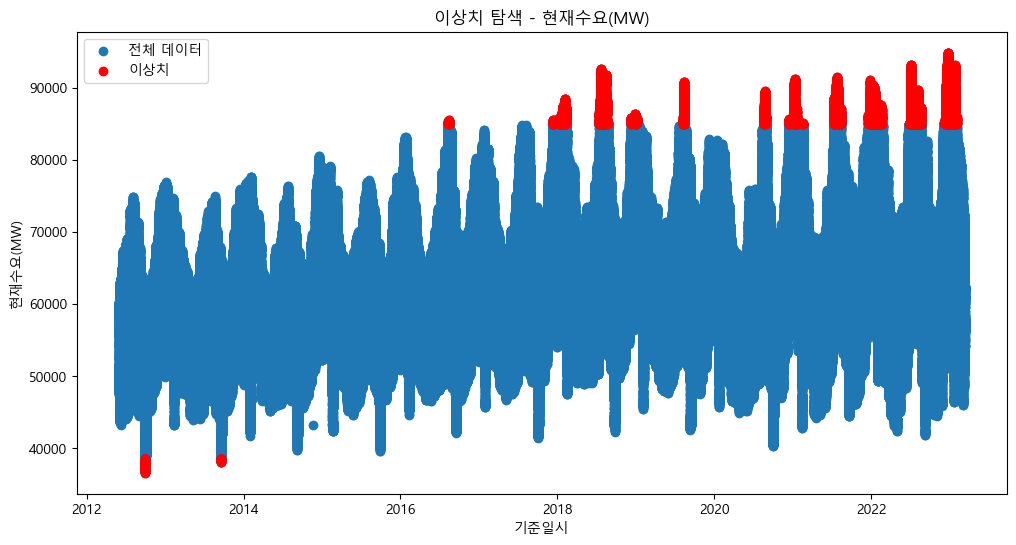

In [19]:
import matplotlib.pyplot as plt

# 한글폰트설정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 현재수요(MW) 칼럼의 이상치 탐색 함수
def detect_outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
    return outliers

# 현재수요(MW) 칼럼의 이상치 탐색
outliers = detect_outliers(ED, '현재수요(MW)')

# 이상치를 포함한 전체 데이터의 박스플롯 그리기
plt.figure(figsize=(8, 6))
plt.boxplot(ED['현재수요(MW)'])
plt.xlabel('현재수요(MW)')
plt.ylabel('값')
plt.title('이상치 탐색 - 현재수요(MW)')
plt.show()

# 이상치를 포함한 데이터의 산점도 그리기

# 산점도 그리기
plt.figure(figsize=(12, 6))
plt.scatter(ED['기준일시'], ED['현재수요(MW)'], label='전체 데이터')
plt.scatter(outliers['기준일시'], outliers['현재수요(MW)'], color='red', label='이상치')
plt.xlabel('기준일시')
plt.ylabel('현재수요(MW)')
plt.title('이상치 탐색 - 현재수요(MW)')
plt.legend()
plt.show()




* 산점도를 보니 코로나가 있었던 2020년을 제외하면 2018년 이후로 전력수요량이 비슷한 경향을 보인다.
* 2018년 이후로 이상치로 탐색된 지점은 그 이전 전력수요량 작았던 기간이 반영된 결과로 오히려 정상수치로 보임. 
* 히트맵으로 알아보면

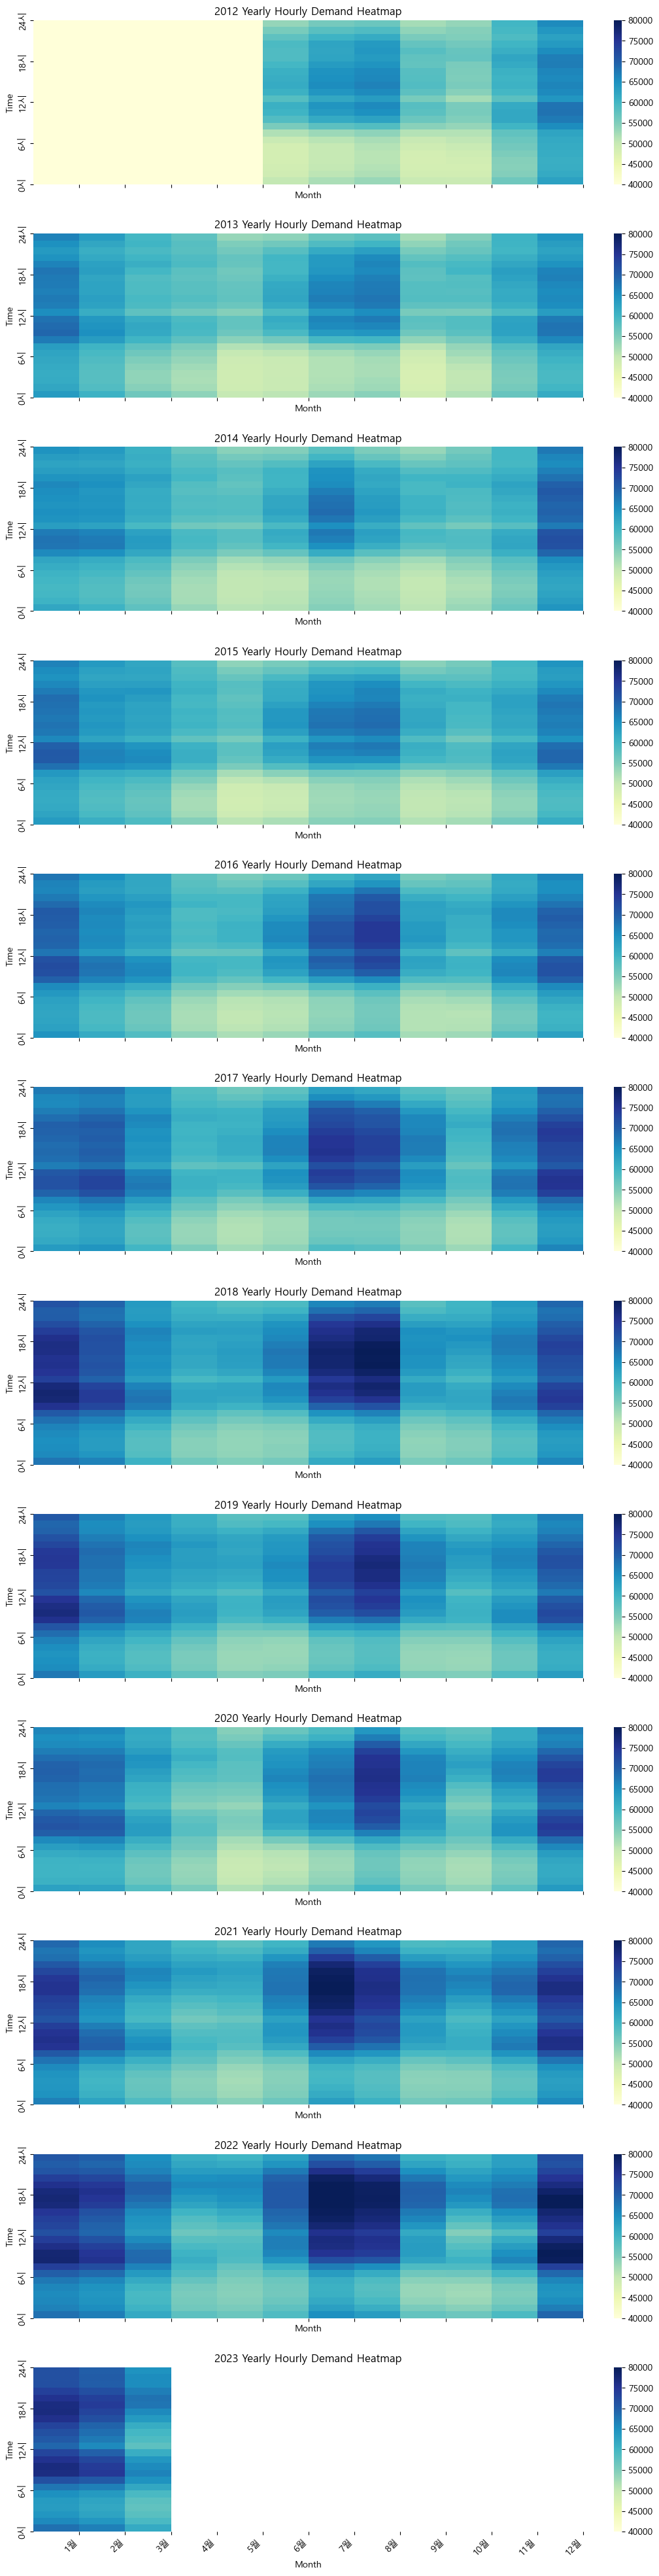

In [20]:
import seaborn as sns

# 히트맵의 2012년 데이터를 x축에 맞게 표현하기위해 임시로 없는 일시를 채우고 그 값을 0으로 한다.

# 잠시 ED파일을 복사
ED_du = ED.copy()

# 기준일시를 datetime 형식으로 변환
ED_du['기준일시'] = pd.to_datetime(ED_du['기준일시'])

# 5분 간격으로 datetime 범위 생성
start_date = pd.to_datetime('2012-01-01 00:00:00')
end_date = pd.to_datetime('2012-05-31 23:55:00')
new_dates = pd.date_range(start_date, end_date, freq='5min')

# 새로운 데이터프레임 생성
new_data = pd.DataFrame({
    '기준일시': new_dates,
    '현재수요(MW)': 0
})

# 기존 데이터프레임과 새로운 데이터프레임 병합
ED2 = pd.concat([new_data,ED_du])

# '년도', '월', '시간' 열 추가
ED2['년도'] = ED2['기준일시'].dt.year
ED2['월'] = ED2['기준일시'].dt.month
ED2['시간'] = ED2['기준일시'].dt.hour

# 년도별로 데이터프레임 분할
df_yearly = ED2.groupby('년도')

# 히트맵 그리기
fig, axes = plt.subplots(len(df_yearly), figsize=(12, 4*len(df_yearly)), sharex=True, sharey=True)

vmin = 40000  # 범례의 최소값
vmax = 80000  # 범례의 최대값

for i, (year, group) in enumerate(df_yearly):
    
    # 월별 시간별 전력수요 피벗 테이블 생성
    pivot_table = group.pivot_table(index='시간', columns='월', values='현재수요(MW)')

    # 히트맵 그리기
    sns.heatmap(pivot_table, cmap='YlGnBu', ax=axes[i], vmin=vmin, vmax=vmax, cbar_kws={'fraction': 0.046})
    axes[i].set_title(f'{year} Yearly Hourly Demand Heatmap')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Time')
    axes[i].invert_yaxis()  # Y축 뒤집기

    # 월 축 눈금 설정
    axes[i].set_xticks(range(1, 13, 1))
    axes[i].set_xticklabels(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월'], rotation=45, ha='right')

    # 시간 축에 눈금과 눈금 라벨 추가
    axes[i].set_yticks(range(0, 25, 6))
    axes[i].set_yticklabels(['0시', '6시', '12시', '18시', '24시'])
        
fig.subplots_adjust(hspace=0.3, bottom=0.1, top=0.9)  # 그래프의 상하 여백 및 상단과 하단 여백 조정
plt.show()



* 2018년부터 2023년 데이터와 유사해지기 시작. 
* 2022년이 가장 비슷하고 2020년이 코로나 탓에 다른 경향을 보이는 것으로 추정.
* 2023년의 전력수요량을 예측하려면 2018년 자료부터 사용해야한다고 판단.

In [21]:
# 2018년부터 데이터 추출
ED_2018_2023 = ED[ED['기준일시'] >= '2018-01-01 00:00:00']

# 결과 출력
ED_2018_2023.reset_index(drop=True, inplace=True)
ED_2018_2023

,기준일시,현재수요(MW)
0,2018-01-01 00:00:00,60955.00
1,2018-01-01 00:05:00,60964.30
2,2018-01-01 00:10:00,60745.90
3,2018-01-01 00:15:00,60170.50
4,2018-01-01 00:20:00,60067.70
...,...,...
545788,2023-03-12 23:35:00,60235.18
545789,2023-03-12 23:40:00,60106.61
545790,2023-03-12 23:45:00,59725.49
545791,2023-03-12 23:50:00,59485.58


In [22]:
# 전력수요량 2018~2023 통계정보
ED_2018_2023.describe()

,현재수요(MW)
count,545793.000000
mean,64293.264139
std,8874.573097
min,40299.300000
25%,57655.300000
50%,63553.340000
75%,69887.600000
max,94852.870000


In [23]:
ED_2018_2023.to_csv('5분단위_전력수요량(2018.01.01~2023.03.12).csv')

* 2018년부터 2023년 3월 12일 까지 전력수요량 데이터를 모음. 
* 이 기간을 기준으로 변수데이터를 모을것.
* 전력수요량 데이터 EDA 끝.  

* 잠시 예측해야할 2023-03-13~2023-03-13 전력수요량 데이터를 확인해보자.

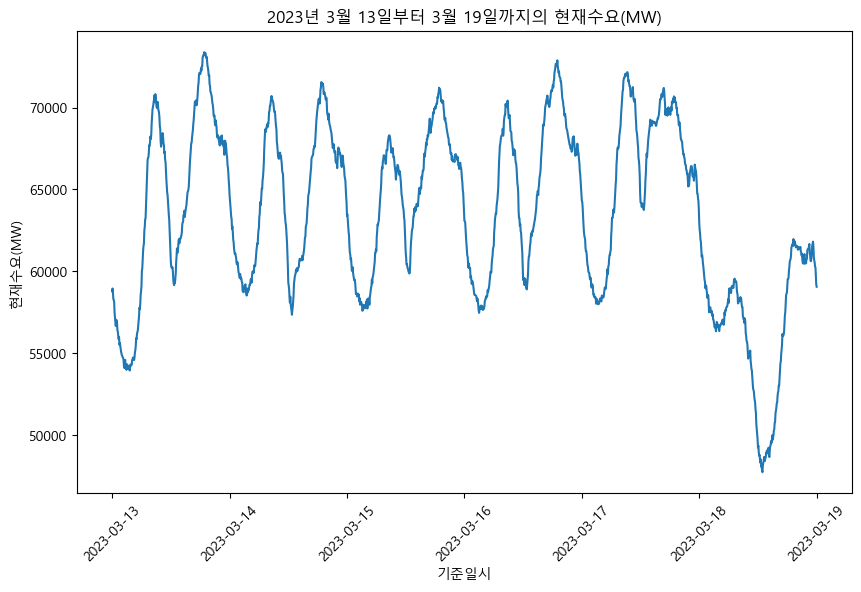

In [24]:
# 필요한 기간의 데이터 추출
start_date = pd.to_datetime('2023-03-13')
end_date = pd.to_datetime('2023-03-19')
filtered_df = df_cd_merge[(df_cd_merge['기준일시'] >= start_date) & (df_cd_merge['기준일시'] <= end_date)]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['기준일시'], filtered_df['현재수요(MW)'])
plt.xlabel('기준일시')
plt.ylabel('현재수요(MW)')
plt.title('2023년 3월 13일부터 3월 19일까지의 현재수요(MW)')
plt.xticks(rotation=45)
plt.show()

## 2. 기상데이터 EDA

## 1) 기상데이터 불러오기 & 결합

* 기상데이터가 1년단위로 뽑힘.  
  2018년부터 2023년3월 12일까지 1년단위로 불러와 결합

In [25]:
# 1년 단위로 추출한 기상데이터 불러오기
weather_18 = pd.read_csv("2018기상정보.csv",encoding='cp949')
weather_19 = pd.read_csv("2019기상정보.csv",encoding='cp949')
weather_20 = pd.read_csv("2020기상정보.csv",encoding='cp949')
weather_21 = pd.read_csv("2021기상정보.csv",encoding='cp949')
weather_22 = pd.read_csv("2022기상정보.csv",encoding='cp949')
weather_23 = pd.read_csv("2023기상정보.csv",encoding='cp949')

# 전체 병합
weather = pd.concat([weather_18,weather_19,weather_20,weather_21,weather_22,weather_23])
weather

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,현지기압(hPa),현지기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),전운량(10분위),지면온도(°C),지면온도 QC플래그
0,90,속초,2018-01-01 00:00,-1.0,0.0,NaN,NaN,1.1,NaN,250.0,...,1019.4,0.0,NaN,9.0,NaN,9.0,NaN,NaN,-2.3,0.0
1,90,속초,2018-01-01 01:00,-2.1,0.0,NaN,NaN,1.7,0.0,230.0,...,1019.7,0.0,NaN,9.0,NaN,9.0,NaN,NaN,-2.7,0.0
2,90,속초,2018-01-01 02:00,-2.1,0.0,NaN,NaN,1.4,0.0,160.0,...,1020.1,0.0,NaN,9.0,NaN,9.0,NaN,NaN,-3.0,0.0
3,90,속초,2018-01-01 03:00,-2.2,0.0,NaN,NaN,0.9,0.0,230.0,...,1020.4,0.0,NaN,9.0,NaN,9.0,NaN,NaN,-3.2,0.0
4,90,속초,2018-01-01 04:00,-2.0,0.0,NaN,NaN,1.2,0.0,250.0,...,1020.4,0.0,NaN,9.0,NaN,9.0,NaN,NaN,-3.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161875,295,남해,2023-03-12 19:00,7.6,NaN,NaN,9.0,4.5,NaN,320.0,...,1014.0,NaN,0.0,NaN,NaN,9.0,NaN,10.0,7.1,NaN
161876,295,남해,2023-03-12 20:00,6.1,NaN,NaN,9.0,3.8,NaN,290.0,...,1014.9,NaN,NaN,9.0,NaN,9.0,NaN,10.0,5.5,NaN
161877,295,남해,2023-03-12 21:00,4.9,NaN,NaN,9.0,4.4,NaN,290.0,...,1015.9,NaN,NaN,9.0,NaN,9.0,NaN,9.0,3.9,NaN
161878,295,남해,2023-03-12 22:00,3.8,NaN,NaN,9.0,6.4,NaN,290.0,...,1016.8,NaN,NaN,9.0,NaN,9.0,NaN,1.0,2.0,NaN


In [26]:
# 기상관련Q&A: https://bd.kma.go.kr/contest/faq_view.do#

* 변수 설명
  - 기온: 섭씨단위로 표현된 대기의 온도.지면으로부터 1.5m 높이에서 사람기준으로 측정.   
  - 강수량: 강수는 구름이나 공기 중으로부터 지면에 떨어진 액체 또는 고체의 수증기 응결체로서, 비, 이슬비, 얼음싸라기, 눈, 우박, 눈보라             등을 포함. 눈과 같은 고체성 강수는 융해시킨 물의 깊이로 측정하여 강수에 포함.
  - 풍속: 바람의 속도. 시간당 풍속은 해당 시각의 10분전 부터 정시까지의 10개의 1분 평균 풍향・풍속의 평균값으로 산출. 13:00 산출값은             12:51~13:00까지의 평균값..
  - 풍향(16방위): 풍향을 N, NNE, NE, ENE(영문표기)등의 16방위로 측정. 0~360(북은 0°또는 360)로 환산할 수 있으며, 시계 방향으로 
                  동은 90°, 서는 270°가 됨.
  - 습도: 수증기 함유량에 관한 대기의 상태. 기상청은 상대습도를 기준으로 습도를 측정·수집함.
  - 현지기압: 대기의 무게로 인한 압력.
  - 일사: 단위면적이 단위시간에 받는 일사에너지 양.
  - 일조: 일사가 구름이나 안개 등에 차단되지 않고 경계값 이상 지표면에 도달한 시간.
  - 적설: 관측노장에 쌓여 있는 눈의 높이.
  - 전운량(10분위): 구름의 양. 0은 맑은 하늘을 의미하고 10은 구름이 많이 낀 하늘을 의미.
  - 지면온도: 말그대로 지면온도로 온도계 주위 30cm의 잔디를 제거해 맨땅이 노출되게 하고, 직사광선에 의한 오차를 줄이기 위해 감지부의                 금속부분을 흙으로 얇게 덮어 측정.
  - QC플래그: 시간 자료에 대해 관측값의 정상 여부를 판단하는 품질검사 자료.

## 2) 기상데이터 추출 및 변환

* QC플래그는 시간 자료에 대해 관측값의 정상 여부를 판단하는 품질검사 자료임.
* 플래그 종류(의미): 0(정상), 1(오류), 9(결측)
* 위 데이터를 확인해보니 QC플래그는 의미를 알 수 없는 공란이 많아 보임.  
  확인해보면

In [27]:
# QC플래그 칼럼값 추출
contains_qc = weather.columns.str.contains('QC')
qc_columns = weather.columns[contains_qc].tolist()
weather[qc_columns]

,기온 QC플래그,강수량 QC플래그,풍속 QC플래그,풍향 QC플래그,습도 QC플래그,현지기압 QC플래그,일조 QC플래그,일사 QC플래그,지면온도 QC플래그
0,0.0,NaN,NaN,NaN,0.0,0.0,9.0,9.0,0.0
1,0.0,NaN,0.0,0.0,0.0,0.0,9.0,9.0,0.0
2,0.0,NaN,0.0,0.0,0.0,0.0,9.0,9.0,0.0
3,0.0,NaN,0.0,0.0,0.0,0.0,9.0,9.0,0.0
4,0.0,NaN,0.0,0.0,0.0,0.0,9.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...
161875,NaN,9.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN
161876,NaN,9.0,NaN,NaN,NaN,NaN,9.0,9.0,NaN
161877,NaN,9.0,NaN,NaN,NaN,NaN,9.0,9.0,NaN
161878,NaN,9.0,NaN,NaN,NaN,NaN,9.0,9.0,NaN


In [28]:
# QC플래그 값 빈도수 확인

result_df = pd.DataFrame()
for column in qc_columns:
    counts = weather[column].value_counts(dropna=False).to_frame().reset_index() # NaN 값과 0.0 값을 구분하기 위함
    counts.columns = [column, 'Counts']
    result_df = pd.concat([result_df, counts], axis=1)

pd.DataFrame(result_df)

,기온 QC플래그,Counts,강수량 QC플래그,Counts,풍속 QC플래그,Counts,풍향 QC플래그,Counts,습도 QC플래그,Counts,현지기압 QC플래그,Counts,일조 QC플래그,Counts,일사 QC플래그,Counts,지면온도 QC플래그,Counts
0,NaN,3599033,NaN,3531312.0,NaN,3635211.0,NaN,3634870.0,NaN,3601009.0,NaN,3601823,NaN,1991133,9.0,3212397,NaN,3579938
1,0.0,723895,9.0,735595.0,0.0,687349.0,0.0,687274.0,0.0,720508.0,0.0,720789,9.0,1970133,NaN,951185,0.0,739638
2,9.0,3341,0.0,59639.0,9.0,3986.0,9.0,4402.0,9.0,5029.0,9.0,3595,0.0,365109,0.0,162813,9.0,6912
3,1.0,277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,339,1.0,171,1.0,151,1.0,58


* 의미를 알 수 없는 NaN 값이 많다.
* 일조와 일사값의 경우 결측값도 많다.  
* 하지만 모델 정확도를 위해 의미를 알 수 있는 값만 추출해서 활용할 수 있음.
* 이상치로 분류된 값들의 품질판단도 가능
* 필요할시 활용하고 전처리 단계에서는 데이터 상태 파악만 하고 일단 제거

In [29]:
# QC플래그 제거 자료
weather_dqc = weather.drop(qc_columns, axis=1)
weather_dqc

,지점,지점명,일시,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
0,90,속초,2018-01-01 00:00,-1.0,NaN,1.1,250.0,23.0,1019.4,NaN,NaN,NaN,NaN,-2.3
1,90,속초,2018-01-01 01:00,-2.1,NaN,1.7,230.0,28.0,1019.7,NaN,NaN,NaN,NaN,-2.7
2,90,속초,2018-01-01 02:00,-2.1,NaN,1.4,160.0,29.0,1020.1,NaN,NaN,NaN,NaN,-3.0
3,90,속초,2018-01-01 03:00,-2.2,NaN,0.9,230.0,28.0,1020.4,NaN,NaN,NaN,NaN,-3.2
4,90,속초,2018-01-01 04:00,-2.0,NaN,1.2,250.0,27.0,1020.4,NaN,NaN,NaN,NaN,-3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161875,295,남해,2023-03-12 19:00,7.6,NaN,4.5,320.0,52.0,1014.0,0.0,NaN,NaN,10.0,7.1
161876,295,남해,2023-03-12 20:00,6.1,NaN,3.8,290.0,47.0,1014.9,NaN,NaN,NaN,10.0,5.5
161877,295,남해,2023-03-12 21:00,4.9,NaN,4.4,290.0,50.0,1015.9,NaN,NaN,NaN,9.0,3.9
161878,295,남해,2023-03-12 22:00,3.8,NaN,6.4,290.0,49.0,1016.8,NaN,NaN,NaN,1.0,2.0


* 데이터가 지점별 관측자료로 되어있다.
* 전력자료가 전국단위이기 때문에 일시기준으로 기상자료를 통합, 평균 내어 데이터를 정리한다. 
* 그리고 프로젝트 유의사항에 맞게 일시를 5분단위로 변환해야 함.   
* 데이터가 연속적인 특징이 있으므로 5분단위 보간법(interpolation)사용.


In [30]:
# 일시를 datetime으로 변환 
weather_dqc['일시'] = pd.to_datetime(weather_dqc['일시'])

# 필요없는 칼럼 제거 
weather_dqc = weather_dqc.drop(['지점','지점명'], axis=1)

# 일시 기준으로 평균계산
weather_mean = weather_dqc.groupby('일시').mean()
weather_mean

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,,
2018-01-01 00:00:00,-1.298947,NaN,1.595789,176.315789,55.042105,1011.750526,NaN,NaN,1.65,2.136364,-1.706316
2018-01-01 01:00:00,-1.638947,NaN,1.691579,206.526316,56.305263,1011.715789,NaN,NaN,1.65,NaN,-1.906316
2018-01-01 02:00:00,-2.004211,NaN,1.598947,188.105263,57.957895,1011.876842,NaN,NaN,1.65,NaN,-2.157895
2018-01-01 03:00:00,-2.328421,0.00,1.660000,185.368421,59.294737,1012.274737,NaN,NaN,1.65,1.500000,-2.467368
2018-01-01 04:00:00,-2.715789,NaN,1.692632,181.789474,60.515789,1012.353684,NaN,NaN,1.65,1.363636,-2.761053
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-12 19:00:00,5.205263,NaN,4.594737,279.157895,59.642105,1007.001053,0.041053,0.04451,NaN,7.347368,4.962105
2023-03-12 20:00:00,4.382105,NaN,5.033684,280.842105,55.200000,1008.040000,NaN,NaN,NaN,6.378947,3.787368
2023-03-12 21:00:00,3.596842,0.19,5.066316,281.894737,51.852632,1008.938947,NaN,NaN,NaN,5.736842,2.909474


In [31]:
# 5분 단위로 보간(interpolation)
weather_interpolated = weather_mean.resample('5T').interpolate()
weather_interpolated

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,,
2018-01-01 00:00:00,-1.298947,NaN,1.595789,176.315789,55.042105,1011.750526,NaN,NaN,1.650000,2.136364,-1.706316
2018-01-01 00:05:00,-1.327281,NaN,1.603772,178.833333,55.147368,1011.747632,NaN,NaN,1.650000,2.118687,-1.722982
2018-01-01 00:10:00,-1.355614,NaN,1.611754,181.350877,55.252632,1011.744737,NaN,NaN,1.650000,2.101010,-1.739649
2018-01-01 00:15:00,-1.383947,NaN,1.619737,183.868421,55.357895,1011.741842,NaN,NaN,1.650000,2.083333,-1.756316
2018-01-01 00:20:00,-1.412281,NaN,1.627719,186.385965,55.463158,1011.738947,NaN,NaN,1.650000,2.065657,-1.772982
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-12 22:40:00,2.345965,0.19,5.182105,284.210526,47.964912,1010.030175,0.041053,0.04451,0.796667,5.231579,1.650175
2023-03-12 22:45:00,2.279474,0.19,5.175526,284.078947,47.755263,1010.071842,0.041053,0.04451,0.797500,5.260526,1.590000
2023-03-12 22:50:00,2.212982,0.19,5.168947,283.947368,47.545614,1010.113509,0.041053,0.04451,0.798333,5.289474,1.529825


* 필요한 데이터를 추출 및 변환하였다.
* 데이터 탐색 시작

## 3) 기상데이터 탐색

In [32]:
# 기상데이터 크기
weather_interpolated.shape

(546325, 11)

In [33]:
# 기상데이터 정보
weather_interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 546325 entries, 2018-01-01 00:00:00 to 2023-03-12 23:00:00
Freq: 5T
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   기온(°C)     546325 non-null  float64
 1   강수량(mm)    546289 non-null  float64
 2   풍속(m/s)    546325 non-null  float64
 3   풍향(16방위)   546325 non-null  float64
 4   습도(%)      546325 non-null  float64
 5   현지기압(hPa)  546325 non-null  float64
 6   일조(hr)     546229 non-null  float64
 7   일사(MJ/m2)  546229 non-null  float64
 8   적설(cm)     546325 non-null  float64
 9   전운량(10분위)  546325 non-null  float64
 10  지면온도(°C)   546325 non-null  float64
dtypes: float64(11)
memory usage: 50.0 MB


In [34]:
# 결측값 확인
weather_interpolated.isnull().sum()

기온(°C)        0
강수량(mm)      36
풍속(m/s)       0
풍향(16방위)      0
습도(%)         0
현지기압(hPa)     0
일조(hr)       96
일사(MJ/m2)    96
적설(cm)        0
전운량(10분위)     0
지면온도(°C)      0
dtype: int64

* 강수량, 일조, 일사열에 결측값이 있다. 
* 일시를 살펴보면

In [35]:
# 강수량 결측값 행
rain_nan_rows = weather_interpolated[weather_interpolated['강수량(mm)'].isna()]
rain_nan_rows

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,,
2018-01-01 00:00:00,-1.298947,NaN,1.595789,176.315789,55.042105,1011.750526,NaN,NaN,1.65,2.136364,-1.706316
2018-01-01 00:05:00,-1.327281,NaN,1.603772,178.833333,55.147368,1011.747632,NaN,NaN,1.65,2.118687,-1.722982
2018-01-01 00:10:00,-1.355614,NaN,1.611754,181.350877,55.252632,1011.744737,NaN,NaN,1.65,2.101010,-1.739649
2018-01-01 00:15:00,-1.383947,NaN,1.619737,183.868421,55.357895,1011.741842,NaN,NaN,1.65,2.083333,-1.756316
2018-01-01 00:20:00,-1.412281,NaN,1.627719,186.385965,55.463158,1011.738947,NaN,NaN,1.65,2.065657,-1.772982
2018-01-01 00:25:00,-1.440614,NaN,1.635702,188.903509,55.568421,1011.736053,NaN,NaN,1.65,2.047980,-1.789649
2018-01-01 00:30:00,-1.468947,NaN,1.643684,191.421053,55.673684,1011.733158,NaN,NaN,1.65,2.030303,-1.806316
2018-01-01 00:35:00,-1.497281,NaN,1.651667,193.938596,55.778947,1011.730263,NaN,NaN,1.65,2.012626,-1.822982
2018-01-01 00:40:00,-1.525614,NaN,1.659649,196.456140,55.884211,1011.727368,NaN,NaN,1.65,1.994949,-1.839649


In [36]:
# 일조 결측값 행 
sun_nan_rows = weather_interpolated[weather_interpolated['일조(hr)'].isna()]
sun_nan_rows

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,,
2018-01-01 00:00:00,-1.298947,NaN,1.595789,176.315789,55.042105,1011.750526,NaN,NaN,1.65,2.136364,-1.706316
2018-01-01 00:05:00,-1.327281,NaN,1.603772,178.833333,55.147368,1011.747632,NaN,NaN,1.65,2.118687,-1.722982
2018-01-01 00:10:00,-1.355614,NaN,1.611754,181.350877,55.252632,1011.744737,NaN,NaN,1.65,2.101010,-1.739649
2018-01-01 00:15:00,-1.383947,NaN,1.619737,183.868421,55.357895,1011.741842,NaN,NaN,1.65,2.083333,-1.756316
2018-01-01 00:20:00,-1.412281,NaN,1.627719,186.385965,55.463158,1011.738947,NaN,NaN,1.65,2.065657,-1.772982
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 07:35:00,-4.022193,0.0,1.362807,154.605263,65.372807,1013.212105,NaN,NaN,1.65,1.549242,-3.529825
2018-01-01 07:40:00,-4.042807,0.0,1.344561,154.000000,65.498246,1013.260000,NaN,NaN,1.65,1.530303,-3.531228
2018-01-01 07:45:00,-4.063421,0.0,1.326316,153.394737,65.623684,1013.307895,NaN,NaN,1.65,1.511364,-3.532632


In [37]:
# 일사 결측값 행 
solar_nan_rows = weather_interpolated[weather_interpolated['일사(MJ/m2)'].isna()]
solar_nan_rows

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,,
2018-01-01 00:00:00,-1.298947,NaN,1.595789,176.315789,55.042105,1011.750526,NaN,NaN,1.65,2.136364,-1.706316
2018-01-01 00:05:00,-1.327281,NaN,1.603772,178.833333,55.147368,1011.747632,NaN,NaN,1.65,2.118687,-1.722982
2018-01-01 00:10:00,-1.355614,NaN,1.611754,181.350877,55.252632,1011.744737,NaN,NaN,1.65,2.101010,-1.739649
2018-01-01 00:15:00,-1.383947,NaN,1.619737,183.868421,55.357895,1011.741842,NaN,NaN,1.65,2.083333,-1.756316
2018-01-01 00:20:00,-1.412281,NaN,1.627719,186.385965,55.463158,1011.738947,NaN,NaN,1.65,2.065657,-1.772982
...,...,...,...,...,...,...,...,...,...,...,...
2018-01-01 07:35:00,-4.022193,0.0,1.362807,154.605263,65.372807,1013.212105,NaN,NaN,1.65,1.549242,-3.529825
2018-01-01 07:40:00,-4.042807,0.0,1.344561,154.000000,65.498246,1013.260000,NaN,NaN,1.65,1.530303,-3.531228
2018-01-01 07:45:00,-4.063421,0.0,1.326316,153.394737,65.623684,1013.307895,NaN,NaN,1.65,1.511364,-3.532632


* 결측값들이 전부 2018-01-01 하루의 데이터에 몰려있다. 
* 다른 일자에 데이터가 많고 연속형 데이터이기 때문에 결측값을 특정값으로 대체하는것 보다   
  2018-01-01 데이터를 삭제하는 것이 낫다고 판단. 
* 2018-01-01 데이터 삭제

In [38]:
# 2018-01-01 데이터 삭제
weather_interpolated = weather_interpolated.drop(
                       weather_interpolated[weather_interpolated.index.strftime('%Y-%m-%d') == '2018-01-01'].index)
weather_interpolated

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,,
2018-01-02 00:00:00,-2.530526,0.00,1.232632,124.105263,65.536842,1015.181053,0.021654,0.025102,1.150000,0.363636,-2.618947
2018-01-02 00:05:00,-2.562719,0.00,1.215175,124.359649,65.683333,1015.179211,0.021429,0.025103,1.229167,0.361111,-2.649386
2018-01-02 00:10:00,-2.594912,0.00,1.197719,124.614035,65.829825,1015.177368,0.021203,0.025105,1.308333,0.358586,-2.679825
2018-01-02 00:15:00,-2.627105,0.00,1.180263,124.868421,65.976316,1015.175526,0.020977,0.025106,1.387500,0.356061,-2.710263
2018-01-02 00:20:00,-2.659298,0.00,1.162807,125.122807,66.122807,1015.173684,0.020752,0.025108,1.466667,0.353535,-2.740702
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-12 22:40:00,2.345965,0.19,5.182105,284.210526,47.964912,1010.030175,0.041053,0.044510,0.796667,5.231579,1.650175
2023-03-12 22:45:00,2.279474,0.19,5.175526,284.078947,47.755263,1010.071842,0.041053,0.044510,0.797500,5.260526,1.590000
2023-03-12 22:50:00,2.212982,0.19,5.168947,283.947368,47.545614,1010.113509,0.041053,0.044510,0.798333,5.289474,1.529825


In [39]:
# 기상데이터 통계량 
weather_interpolated.describe()

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
count,546037.000000,546037.000000,546037.000000,546037.000000,546037.000000,546037.000000,546037.000000,546037.000000,546037.000000,546037.000000,546037.000000
mean,12.915842,0.590570,1.950019,171.090766,69.069303,1004.332584,0.272564,0.599077,3.470915,5.257037,14.944441
std,9.969480,1.302177,0.961527,53.389879,17.743538,7.777426,0.349038,0.834624,6.540008,3.001894,12.061430
min,-15.128421,0.000000,0.462766,54.842105,18.978947,970.706316,0.000000,0.000000,0.000000,0.000000,-9.335106
25%,4.816842,0.000000,1.183421,127.157895,56.252632,998.286579,0.003838,0.013450,0.373032,2.651434,4.515211
50%,13.344561,0.114966,1.747281,161.368421,71.315789,1004.769474,0.052632,0.059403,0.732063,5.382979,14.640351
75%,21.493684,0.580556,2.477895,210.342105,84.233333,1010.289649,0.557895,1.067636,2.727083,7.902632,24.049649
max,35.211579,74.600000,7.088421,304.574468,97.968421,1025.016842,1.000000,3.590417,83.000000,10.000000,58.633684


## 4) 기상데이터 시각화

* 데이터 시각화를 통해 데이터 분포, 이상치 탐색, 상관관계를 알아볼 것.

In [40]:
weather_interpolated

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,,
2018-01-02 00:00:00,-2.530526,0.00,1.232632,124.105263,65.536842,1015.181053,0.021654,0.025102,1.150000,0.363636,-2.618947
2018-01-02 00:05:00,-2.562719,0.00,1.215175,124.359649,65.683333,1015.179211,0.021429,0.025103,1.229167,0.361111,-2.649386
2018-01-02 00:10:00,-2.594912,0.00,1.197719,124.614035,65.829825,1015.177368,0.021203,0.025105,1.308333,0.358586,-2.679825
2018-01-02 00:15:00,-2.627105,0.00,1.180263,124.868421,65.976316,1015.175526,0.020977,0.025106,1.387500,0.356061,-2.710263
2018-01-02 00:20:00,-2.659298,0.00,1.162807,125.122807,66.122807,1015.173684,0.020752,0.025108,1.466667,0.353535,-2.740702
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-12 22:40:00,2.345965,0.19,5.182105,284.210526,47.964912,1010.030175,0.041053,0.044510,0.796667,5.231579,1.650175
2023-03-12 22:45:00,2.279474,0.19,5.175526,284.078947,47.755263,1010.071842,0.041053,0.044510,0.797500,5.260526,1.590000
2023-03-12 22:50:00,2.212982,0.19,5.168947,283.947368,47.545614,1010.113509,0.041053,0.044510,0.798333,5.289474,1.529825


C:\Users\user\AppData\Local\Temp\ipykernel_12860\2222872069.py:19: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\user\miniconda3\envs\practice\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


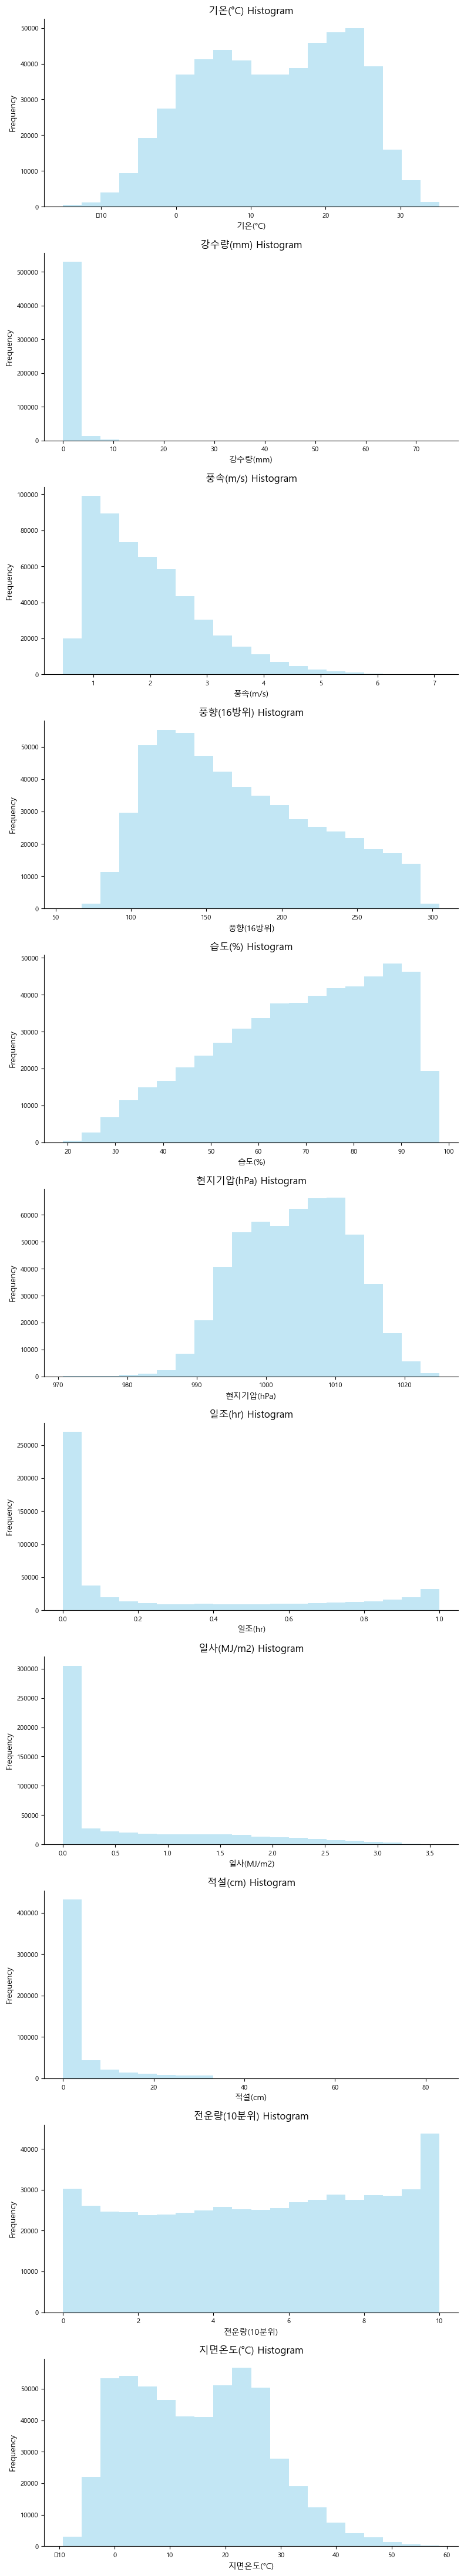

In [41]:
import matplotlib.pyplot as plt

# 변수들 선택
variables = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)', '현지기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '지면온도(°C)']

# 그래프 설정
fig, axes = plt.subplots(len(variables), figsize=(8, 4*len(variables)))

# 변수별 히스토그램 그리기
for i, variable in enumerate(variables):
    axes[i].hist(weather_interpolated[variable].dropna(), bins=20, alpha=0.5, color='skyblue')
    axes[i].set_title(f'{variable} Histogram', fontsize=12)
    axes[i].set_xlabel(variable, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].tick_params(axis='both', which='both', labelsize=8)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_12860\3127306684.py:15: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\user\miniconda3\envs\practice\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


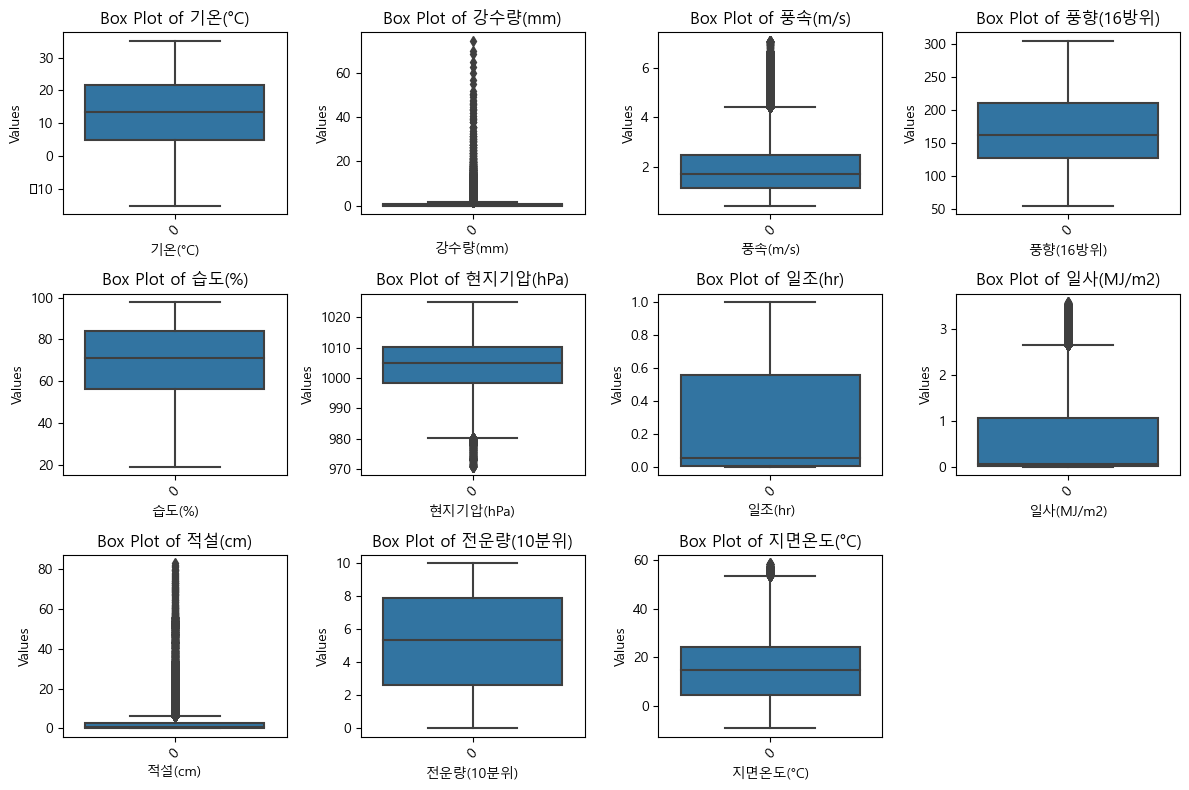

In [42]:
# 박스플롯 

# 그래프 크기 설정
plt.figure(figsize=(12, 8))

# 변수별 박스 플롯 그리기
for i, column in enumerate(weather_interpolated.columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(data=weather_interpolated[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



* 이상치가 다수 감지된 변수들이 있음.
* 하지만 기상변수이기 때문에 정상값일 수 있음.
* 데이터 품질을 따져보기 위해 QC플래그를 활용할 것.
* 먼저 풍속부터

In [43]:
# 이상치 조건 정의
outlier_condition = (weather_interpolated['풍속(m/s)'] > 4) 

# 이상치가 있는 행 추출
outliers = weather_interpolated[outlier_condition]

# 이상치가 있는 행 출력
outliers_wind = pd.DataFrame(outliers)
outliers_wind

,기온(°C),강수량(mm),풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,,
2018-01-08 21:15:00,2.443158,0.420037,4.015000,259.973684,76.010526,996.103947,0.000000,0.016139,0.837104,8.984091,1.135263
2018-01-08 21:20:00,2.427719,0.417192,4.060000,260.912281,75.677193,996.109825,0.000000,0.016156,0.857164,8.963636,1.116491
2018-01-08 21:25:00,2.412281,0.414347,4.105000,261.850877,75.343860,996.115702,0.000000,0.016173,0.877225,8.943182,1.097719
2018-01-08 21:30:00,2.396842,0.411502,4.150000,262.789474,75.010526,996.121579,0.000000,0.016190,0.897285,8.922727,1.078947
2018-01-08 21:35:00,2.381404,0.408657,4.195000,263.728070,74.677193,996.127456,0.000000,0.016207,0.917345,8.902273,1.060175
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-12 22:40:00,2.345965,0.190000,5.182105,284.210526,47.964912,1010.030175,0.041053,0.044510,0.796667,5.231579,1.650175
2023-03-12 22:45:00,2.279474,0.190000,5.175526,284.078947,47.755263,1010.071842,0.041053,0.044510,0.797500,5.260526,1.590000
2023-03-12 22:50:00,2.212982,0.190000,5.168947,283.947368,47.545614,1010.113509,0.041053,0.044510,0.798333,5.289474,1.529825


In [44]:
# 이상치로 분류된 풍속데이터 일시 인덱스 추출

outliers_wind_dates = outliers_wind.index.strftime('%Y-%m-%d %H')
outliers_wind_dates_uq = pd.unique(outliers_wind_dates).tolist()
outliers_wind_dates_uq = [date + ':00:00' for date in outliers_wind_dates_uq]
outliers_wind_dates_uq

['2018-01-08 21:00:00',
 '2018-01-08 22:00:00',
 '2018-01-08 23:00:00',
 '2018-01-09 00:00:00',
 '2018-01-09 01:00:00',
 '2018-01-09 02:00:00',
 '2018-01-09 03:00:00',
 '2018-01-09 04:00:00',
 '2018-01-09 05:00:00',
 '2018-01-09 06:00:00',
 '2018-01-09 07:00:00',
 '2018-01-09 08:00:00',
 '2018-01-09 09:00:00',
 '2018-01-09 10:00:00',
 '2018-01-09 11:00:00',
 '2018-01-09 12:00:00',
 '2018-01-09 13:00:00',
 '2018-01-09 14:00:00',
 '2018-01-09 15:00:00',
 '2018-01-09 16:00:00',
 '2018-01-10 11:00:00',
 '2018-01-10 12:00:00',
 '2018-01-10 13:00:00',
 '2018-01-10 14:00:00',
 '2018-01-10 15:00:00',
 '2018-01-10 16:00:00',
 '2018-01-10 17:00:00',
 '2018-01-11 14:00:00',
 '2018-01-11 15:00:00',
 '2018-01-11 16:00:00',
 '2018-01-22 22:00:00',
 '2018-01-22 23:00:00',
 '2018-01-23 00:00:00',
 '2018-01-23 01:00:00',
 '2018-01-23 02:00:00',
 '2018-01-23 03:00:00',
 '2018-01-23 04:00:00',
 '2018-01-23 05:00:00',
 '2018-01-23 06:00:00',
 '2018-01-23 07:00:00',
 '2018-01-23 08:00:00',
 '2018-01-23 09:

In [45]:
# QC플래그 활용을 위해 weather데이터 불러옴

weather_d= weather.set_index('일시')
weather_d

,지점,지점명,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),풍향 QC플래그,...,현지기압(hPa),현지기압 QC플래그,일조(hr),일조 QC플래그,일사(MJ/m2),일사 QC플래그,적설(cm),전운량(10분위),지면온도(°C),지면온도 QC플래그
일시,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00,90,속초,-1.0,0.0,NaN,NaN,1.1,NaN,250.0,NaN,...,1019.4,0.0,NaN,9.0,NaN,9.0,NaN,NaN,-2.3,0.0
2018-01-01 01:00,90,속초,-2.1,0.0,NaN,NaN,1.7,0.0,230.0,0.0,...,1019.7,0.0,NaN,9.0,NaN,9.0,NaN,NaN,-2.7,0.0
2018-01-01 02:00,90,속초,-2.1,0.0,NaN,NaN,1.4,0.0,160.0,0.0,...,1020.1,0.0,NaN,9.0,NaN,9.0,NaN,NaN,-3.0,0.0
2018-01-01 03:00,90,속초,-2.2,0.0,NaN,NaN,0.9,0.0,230.0,0.0,...,1020.4,0.0,NaN,9.0,NaN,9.0,NaN,NaN,-3.2,0.0
2018-01-01 04:00,90,속초,-2.0,0.0,NaN,NaN,1.2,0.0,250.0,0.0,...,1020.4,0.0,NaN,9.0,NaN,9.0,NaN,NaN,-3.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-12 19:00,295,남해,7.6,NaN,NaN,9.0,4.5,NaN,320.0,NaN,...,1014.0,NaN,0.0,NaN,NaN,9.0,NaN,10.0,7.1,NaN
2023-03-12 20:00,295,남해,6.1,NaN,NaN,9.0,3.8,NaN,290.0,NaN,...,1014.9,NaN,NaN,9.0,NaN,9.0,NaN,10.0,5.5,NaN
2023-03-12 21:00,295,남해,4.9,NaN,NaN,9.0,4.4,NaN,290.0,NaN,...,1015.9,NaN,NaN,9.0,NaN,9.0,NaN,9.0,3.9,NaN


In [47]:
print(weather_d.index.dtype)

object


In [50]:
weather_d.index = pd.to_datetime(weather_d.index)

In [52]:
subset= weather_d.loc[outliers_wind_dates_uq]
wind_QC = pd.DataFrame(subset['풍속 QC플래그'])
wind_QC .value_counts()

풍속 QC플래그
0.0         39358
9.0           234
dtype: int64

* QC플래그 0.0은 정상이고 9.0은 결측

## 5) 기상데이터 스케일링 및 상관관계 분석

## StandardScale

In [62]:
# 풍향제외데이터
weather_interpolated_nwd = weather_interpolated.drop('풍향(16방위)', axis=1)
weather_interpolated_nwd

,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,
2018-01-02 00:00:00,-2.530526,0.00,1.232632,65.536842,1015.181053,0.021654,0.025102,1.150000,0.363636,-2.618947
2018-01-02 00:05:00,-2.562719,0.00,1.215175,65.683333,1015.179211,0.021429,0.025103,1.229167,0.361111,-2.649386
2018-01-02 00:10:00,-2.594912,0.00,1.197719,65.829825,1015.177368,0.021203,0.025105,1.308333,0.358586,-2.679825
2018-01-02 00:15:00,-2.627105,0.00,1.180263,65.976316,1015.175526,0.020977,0.025106,1.387500,0.356061,-2.710263
2018-01-02 00:20:00,-2.659298,0.00,1.162807,66.122807,1015.173684,0.020752,0.025108,1.466667,0.353535,-2.740702
...,...,...,...,...,...,...,...,...,...,...
2023-03-12 22:40:00,2.345965,0.19,5.182105,47.964912,1010.030175,0.041053,0.044510,0.796667,5.231579,1.650175
2023-03-12 22:45:00,2.279474,0.19,5.175526,47.755263,1010.071842,0.041053,0.044510,0.797500,5.260526,1.590000
2023-03-12 22:50:00,2.212982,0.19,5.168947,47.545614,1010.113509,0.041053,0.044510,0.798333,5.289474,1.529825


In [82]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 스케일링 대상 열 선택
columns_to_scale = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '현지기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '지면온도(°C)']

# 스케일링 대상 열 슬라이싱
data_to_scale = weather_interpolated_nwd[columns_to_scale]

# 스케일링 적용
scaled_data = scaler.fit_transform(data_to_scale)

# 스케일링된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# 일시 인덱스 추가
weather_scaled = weather_interpolated_nwd.copy()  # 스케일링된 데이터를 저장할 새로운 데이터프레임 생성
weather_scaled[numerical_columns] = scaler.fit_transform(weather_interpolated[numerical_columns])

# 스케일링된 데이터프레임 출력
weather_scaled

,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,
2018-01-02 00:00:00,-1.549367,-0.453526,-0.746092,-0.199085,1.394867,-0.718860,-0.687705,-0.354880,-1.630106,-1.456163
2018-01-02 00:05:00,-1.552596,-0.453526,-0.764247,-0.190828,1.394631,-0.719506,-0.687703,-0.342775,-1.630947,-1.458686
2018-01-02 00:10:00,-1.555825,-0.453526,-0.782402,-0.182572,1.394394,-0.720153,-0.687702,-0.330670,-1.631789,-1.461210
2018-01-02 00:15:00,-1.559054,-0.453526,-0.800556,-0.174316,1.394157,-0.720799,-0.687700,-0.318565,-1.632630,-1.463734
2018-01-02 00:20:00,-1.562284,-0.453526,-0.818711,-0.166060,1.393920,-0.721445,-0.687698,-0.306460,-1.633471,-1.466257
...,...,...,...,...,...,...,...,...,...,...
2023-03-12 22:40:00,-1.060224,-0.307616,3.361413,-1.189414,0.732581,-0.663283,-0.664452,-0.408906,-0.008481,-1.102214
2023-03-12 22:45:00,-1.066894,-0.307616,3.354571,-1.201229,0.737939,-0.663283,-0.664452,-0.408779,0.001162,-1.107203
2023-03-12 22:50:00,-1.073563,-0.307616,3.347729,-1.213045,0.743296,-0.663283,-0.664452,-0.408652,0.010805,-1.112192


# 상관관계분석

C:\Users\user\miniconda3\envs\practice\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\user\miniconda3\envs\practice\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


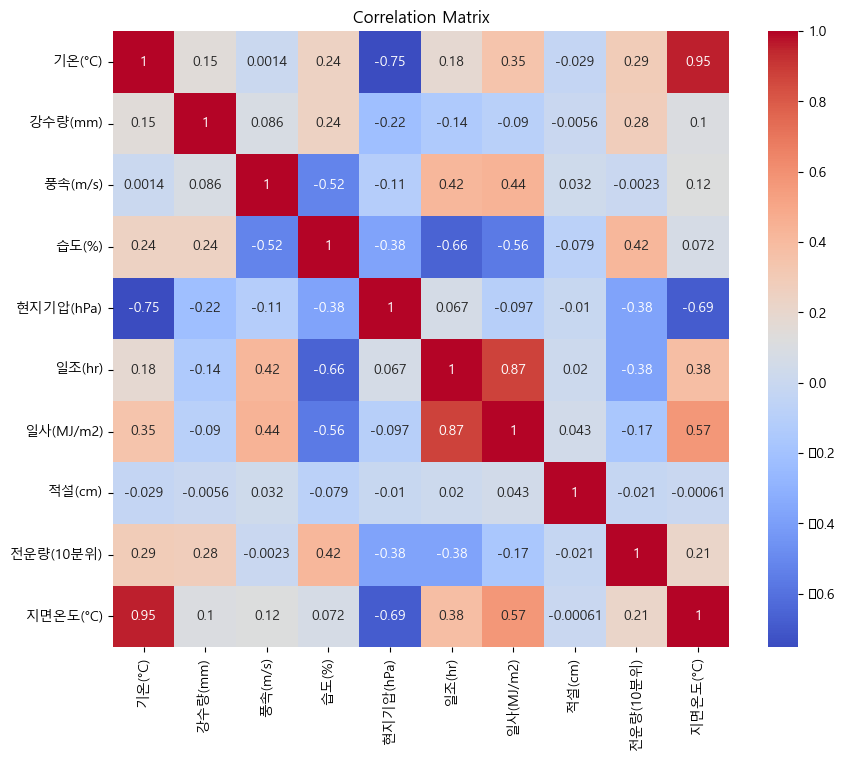

In [83]:
# 상관계수 행렬 계산
correlation_matrix = weather_scaled.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## 주성분분석

In [101]:
from sklearn.decomposition import PCA

# PCA 모델 생성
pca = PCA()

# 주성분 분석을 위한 데이터 선택 (여기서는 수치형 변수들만 사용)
numerical_columns = ['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '현지기압(hPa)', '일조(hr)', '일사(MJ/m2)', '적설(cm)', '전운량(10분위)', '지면온도(°C)']
data_for_pca = weather_scaled[numerical_columns]

# 주성분 분석 수행
pca_result = pca.fit_transform(data_for_pca)

# 주성분 분석 결과 확인
explained_variance_ratio = pca.explained_variance_ratio_
print("주성분 분석 결과:")
print("주성분 설명 분산 비율:", explained_variance_ratio)
print("주성분 누적 설명 분산 비율:", np.cumsum(explained_variance_ratio))

# 주성분 분석 결과를 데이터프레임으로 변환하여 출력
weather_pca = pd.DataFrame(data=pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])
print("주성분 분석 결과 데이터프레임:")
weather_pca


주성분 분석 결과:
주성분 설명 분산 비율: [0.31595062 0.29312508 0.11260336 0.09952215 0.07273798 0.05357176
 0.02343835 0.01813457 0.00990163 0.0010145 ]
주성분 누적 설명 분산 비율: [0.31595062 0.6090757  0.72167906 0.82120121 0.89393919 0.94751095
 0.9709493  0.98908387 0.9989855  1.        ]
주성분 분석 결과 데이터프레임:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.507514,-1.846876,-0.702532,-0.251167,0.605510,0.484197,0.045083,-0.085846,0.418688,0.021425
1,-2.516728,-1.841734,-0.711226,-0.237145,0.613960,0.477433,0.040208,-0.079814,0.419862,0.021317
2,-2.525942,-1.836592,-0.719920,-0.223123,0.622411,0.470668,0.035333,-0.073782,0.421036,0.021209
3,-2.535157,-1.831450,-0.728614,-0.209101,0.630861,0.463903,0.030458,-0.067751,0.422210,0.021102
4,-2.544371,-1.826308,-0.737308,-0.195079,0.639312,0.457138,0.025583,-0.061719,0.423384,0.020994
...,...,...,...,...,...,...,...,...,...,...
546032,-0.583185,-1.928755,2.347021,-0.846043,-1.855167,1.378532,0.288833,-1.011327,-0.004092,0.007719
546033,-0.589080,-1.935378,2.350310,-0.846262,-1.858261,1.366264,0.296989,-1.003527,-0.003842,0.008443
546034,-0.594976,-1.942001,2.353598,-0.846481,-1.861354,1.353996,0.305144,-0.995727,-0.003593,0.009166
546035,-0.600871,-1.948624,2.356887,-0.846700,-1.864448,1.341728,0.313300,-0.987926,-0.003344,0.009890


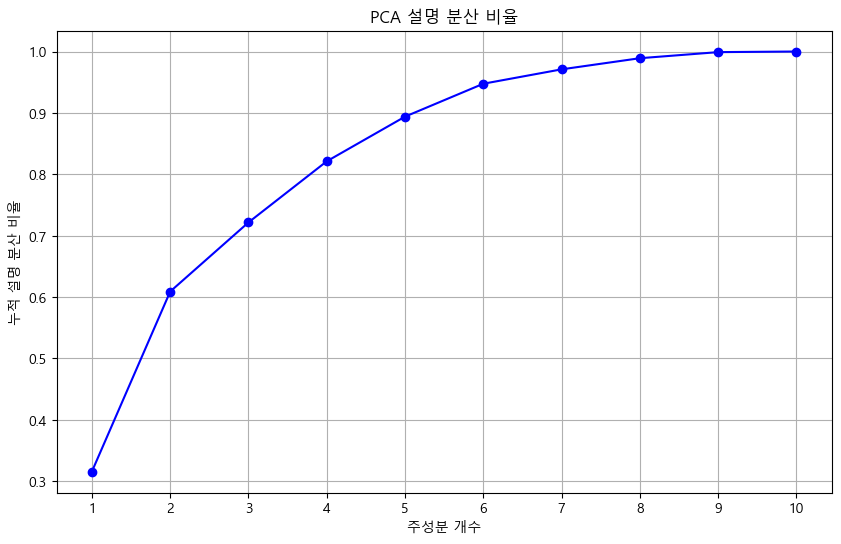

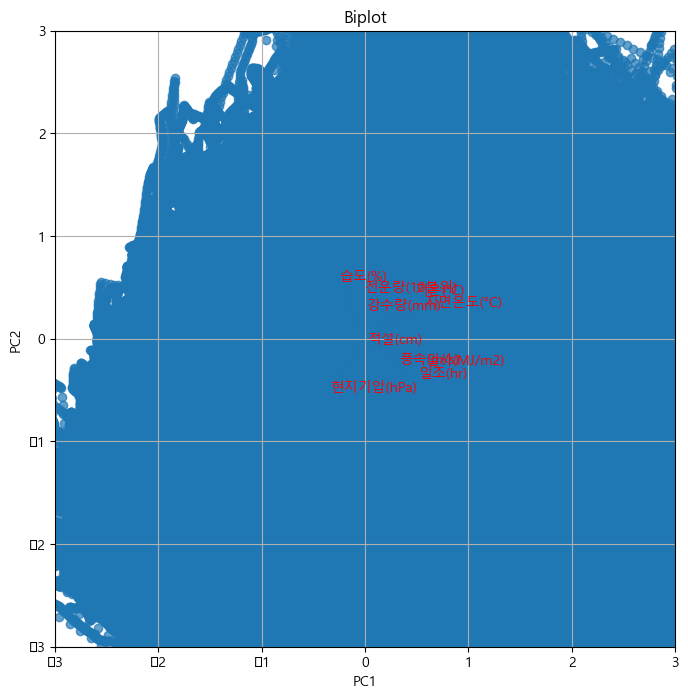

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# 주성분 누적 설명 분산 비율 추출
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Scree plot 그리기

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio)+1), cumulative_explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명 분산 비율')
plt.title('PCA 설명 분산 비율')
plt.xticks(range(1, len(explained_variance_ratio)+1))
plt.grid(True)
plt.show()

# Biplot 그리기
plt.figure(figsize=(8, 8))
for i in range(len(pca.components_)):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.7)
    plt.text(pca.components_[0, i] * 1.2, pca.components_[1, i] * 1.2, data_for_pca.columns[i], color='r')
plt.scatter(weather_pca['PC1'], weather_pca['PC2'], alpha=0.7)
plt.xlim(-3, 3)  # X 축 범위 설정
plt.ylim(-3, 3)  # Y 축 범위 설정
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot')
plt.grid(True)
plt.show()

# 3. 전력데이터와 기상데이터 결합

In [84]:
# 전력데이터
ED_2018_2023.head()

,기준일시,현재수요(MW)
0,2018-01-01 00:00:00,60955.0
1,2018-01-01 00:05:00,60964.3
2,2018-01-01 00:10:00,60745.9
3,2018-01-01 00:15:00,60170.5
4,2018-01-01 00:20:00,60067.7


In [118]:
ED_2018_2023_c = ED_2018_2023.copy()
ED_2018_2023_c['기준일시'] = pd.to_datetime(ED_2018_2023_c ['기준일시'])  # 기준일시 칼럼을 datetime으로 변환
ED_2018_2023_c.set_index('기준일시', inplace=True)  # 인덱스로 기준일시를 설정
ED_2018_2023_c.head()

,현재수요(MW)
기준일시,
2018-01-01 00:00:00,60955.0
2018-01-01 00:05:00,60964.3
2018-01-01 00:10:00,60745.9
2018-01-01 00:15:00,60170.5
2018-01-01 00:20:00,60067.7


In [95]:
# 기상데이터
weather_scaled.head()

,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C)
일시,,,,,,,,,,
2018-01-02 00:00:00,-1.549367,-0.453526,-0.746092,-0.199085,1.394867,-0.718860,-0.687705,-0.354880,-1.630106,-1.456163
2018-01-02 00:05:00,-1.552596,-0.453526,-0.764247,-0.190828,1.394631,-0.719506,-0.687703,-0.342775,-1.630947,-1.458686
2018-01-02 00:10:00,-1.555825,-0.453526,-0.782402,-0.182572,1.394394,-0.720153,-0.687702,-0.330670,-1.631789,-1.461210
2018-01-02 00:15:00,-1.559054,-0.453526,-0.800556,-0.174316,1.394157,-0.720799,-0.687700,-0.318565,-1.632630,-1.463734
2018-01-02 00:20:00,-1.562284,-0.453526,-0.818711,-0.166060,1.393920,-0.721445,-0.687698,-0.306460,-1.633471,-1.466257


In [92]:
# 결합
merged_df = pd.merge(weather_scaled,ED_2018_2023_c, left_index=True, right_index=True, how='inner')
merged_df

,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),현재수요(MW)
2018-01-02 00:00:00,-1.549367,-0.453526,-0.746092,-0.199085,1.394867,-0.718860,-0.687705,-0.354880,-1.630106,-1.456163,60769.40
2018-01-02 00:05:00,-1.552596,-0.453526,-0.764247,-0.190828,1.394631,-0.719506,-0.687703,-0.342775,-1.630947,-1.458686,60556.60
2018-01-02 00:10:00,-1.555825,-0.453526,-0.782402,-0.182572,1.394394,-0.720153,-0.687702,-0.330670,-1.631789,-1.461210,60158.70
2018-01-02 00:15:00,-1.559054,-0.453526,-0.800556,-0.174316,1.394157,-0.720799,-0.687700,-0.318565,-1.632630,-1.463734,59842.30
2018-01-02 00:20:00,-1.562284,-0.453526,-0.818711,-0.166060,1.393920,-0.721445,-0.687698,-0.306460,-1.633471,-1.466257,59771.70
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-12 22:40:00,-1.060224,-0.307616,3.361413,-1.189414,0.732581,-0.663283,-0.664452,-0.408906,-0.008481,-1.102214,60707.96
2023-03-12 22:45:00,-1.066894,-0.307616,3.354571,-1.201229,0.737939,-0.663283,-0.664452,-0.408779,0.001162,-1.107203,60673.42
2023-03-12 22:50:00,-1.073563,-0.307616,3.347729,-1.213045,0.743296,-0.663283,-0.664452,-0.408652,0.010805,-1.112192,60694.90
2023-03-12 22:55:00,-1.080233,-0.307616,3.340886,-1.224860,0.748653,-0.663283,-0.664452,-0.408524,0.020448,-1.117181,60442.74


In [116]:
weather_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.507514,-1.846876,-0.702532,-0.251167,0.605510,0.484197,0.045083,-0.085846,0.418688,0.021425
1,-2.516728,-1.841734,-0.711226,-0.237145,0.613960,0.477433,0.040208,-0.079814,0.419862,0.021317
2,-2.525942,-1.836592,-0.719920,-0.223123,0.622411,0.470668,0.035333,-0.073782,0.421036,0.021209
3,-2.535157,-1.831450,-0.728614,-0.209101,0.630861,0.463903,0.030458,-0.067751,0.422210,0.021102
4,-2.544371,-1.826308,-0.737308,-0.195079,0.639312,0.457138,0.025583,-0.061719,0.423384,0.020994
...,...,...,...,...,...,...,...,...,...,...
546032,-0.583185,-1.928755,2.347021,-0.846043,-1.855167,1.378532,0.288833,-1.011327,-0.004092,0.007719
546033,-0.589080,-1.935378,2.350310,-0.846262,-1.858261,1.366264,0.296989,-1.003527,-0.003842,0.008443
546034,-0.594976,-1.942001,2.353598,-0.846481,-1.861354,1.353996,0.305144,-0.995727,-0.003593,0.009166
546035,-0.600871,-1.948624,2.356887,-0.846700,-1.864448,1.341728,0.313300,-0.987926,-0.003344,0.009890


In [117]:
merged_df_pca = pd.merge(weather_pca,ED_2018_2023_c, left_index=True, right_index=True, how='inner')
merged_df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,현재수요(MW)


In [93]:
merged_df.isnull().sum()

기온(°C)       0
강수량(mm)      0
풍속(m/s)      0
습도(%)        0
현지기압(hPa)    0
일조(hr)       0
일사(MJ/m2)    0
적설(cm)       0
전운량(10분위)    0
지면온도(°C)     0
현재수요(MW)     0
dtype: int64

# 회귀분석

In [115]:
merged_df

,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),현재수요(MW)
2018-01-02 00:00:00,-1.549367,-0.453526,-0.746092,-0.199085,1.394867,-0.718860,-0.687705,-0.354880,-1.630106,-1.456163,60769.40
2018-01-02 00:05:00,-1.552596,-0.453526,-0.764247,-0.190828,1.394631,-0.719506,-0.687703,-0.342775,-1.630947,-1.458686,60556.60
2018-01-02 00:10:00,-1.555825,-0.453526,-0.782402,-0.182572,1.394394,-0.720153,-0.687702,-0.330670,-1.631789,-1.461210,60158.70
2018-01-02 00:15:00,-1.559054,-0.453526,-0.800556,-0.174316,1.394157,-0.720799,-0.687700,-0.318565,-1.632630,-1.463734,59842.30
2018-01-02 00:20:00,-1.562284,-0.453526,-0.818711,-0.166060,1.393920,-0.721445,-0.687698,-0.306460,-1.633471,-1.466257,59771.70
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-12 22:40:00,-1.060224,-0.307616,3.361413,-1.189414,0.732581,-0.663283,-0.664452,-0.408906,-0.008481,-1.102214,60707.96
2023-03-12 22:45:00,-1.066894,-0.307616,3.354571,-1.201229,0.737939,-0.663283,-0.664452,-0.408779,0.001162,-1.107203,60673.42
2023-03-12 22:50:00,-1.073563,-0.307616,3.347729,-1.213045,0.743296,-0.663283,-0.664452,-0.408652,0.010805,-1.112192,60694.90
2023-03-12 22:55:00,-1.080233,-0.307616,3.340886,-1.224860,0.748653,-0.663283,-0.664452,-0.408524,0.020448,-1.117181,60442.74


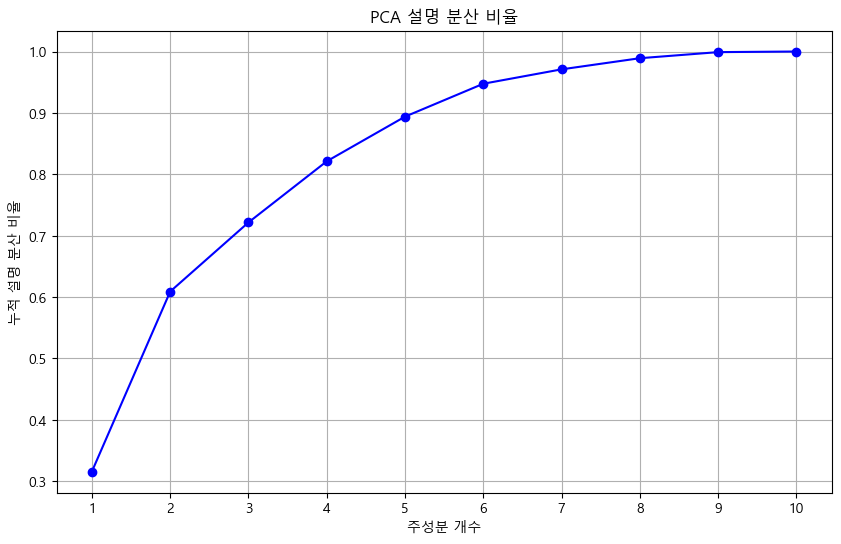

In [112]:
# 주성분 누적 설명 분산 비율 추출
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Scree plot 그리기

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio)+1), cumulative_explained_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명 분산 비율')
plt.title('PCA 설명 분산 비율')
plt.xticks(range(1, len(explained_variance_ratio)+1))
plt.grid(True)
plt.show()

In [111]:
weather_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.507514,-1.846876,-0.702532,-0.251167,0.605510,0.484197,0.045083,-0.085846,0.418688,0.021425
1,-2.516728,-1.841734,-0.711226,-0.237145,0.613960,0.477433,0.040208,-0.079814,0.419862,0.021317
2,-2.525942,-1.836592,-0.719920,-0.223123,0.622411,0.470668,0.035333,-0.073782,0.421036,0.021209
3,-2.535157,-1.831450,-0.728614,-0.209101,0.630861,0.463903,0.030458,-0.067751,0.422210,0.021102
4,-2.544371,-1.826308,-0.737308,-0.195079,0.639312,0.457138,0.025583,-0.061719,0.423384,0.020994
...,...,...,...,...,...,...,...,...,...,...
546032,-0.583185,-1.928755,2.347021,-0.846043,-1.855167,1.378532,0.288833,-1.011327,-0.004092,0.007719
546033,-0.589080,-1.935378,2.350310,-0.846262,-1.858261,1.366264,0.296989,-1.003527,-0.003842,0.008443
546034,-0.594976,-1.942001,2.353598,-0.846481,-1.861354,1.353996,0.305144,-0.995727,-0.003593,0.009166
546035,-0.600871,-1.948624,2.356887,-0.846700,-1.864448,1.341728,0.313300,-0.987926,-0.003344,0.009890


In [114]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# 필요한 가상정보와 전력수요 사이의 상관관계를 고려하여 입력 변수(X)와 출력 변수(y)로 분할
X = weather_pca[['PC1', 'PC2', 'PC3', 'PC4']]
y = merged_df['현재수요(MW)']

# 특정 기간 필터링
start_date = '2022-04-01'
end_date = '2023-03-12'
filtered_X = X[(X.index >= start_date) & (X.index <= end_date)]
filtered_y = y[(y.index >= start_date) & (y.index <= end_date)]

# 회귀분석 모델 학습
reg_model = LinearRegression()
reg_model.fit(filtered_X, filtered_y)

# 특정 기간의 데이터만 선택
start_date = '2023-03-13'
end_date = '2023-03-19'
filtered_X = X.loc[start_date:end_date]
filtered_y = y.loc[start_date:end_date]

# 테스트 데이터에 대한 예측
y_pred = reg_model.predict(filtered_X)

# MAPE 계산
mape = mean_absolute_percentage_error(filtered_y, y_pred)

# 결과 출력
print("Mean Absolute Percentage Error (MAPE):", mape)

# 그래프로 실제값과 예측값 나타내기
plt.plot(filtered_y.index, filtered_y, label='실제값')
plt.plot(filtered_y.index, y_pred, label='예측값')
plt.xlabel('기준일시')
plt.ylabel('전력수요(MW)')
plt.title('전력수요량 {} to {}'.format(start_date, end_date))
plt.xticks(rotation=45)
plt.legend()
plt.show()

TypeError: Invalid comparison between dtype=int64 and str

In [119]:
merged_df

,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),현재수요(MW)
2018-01-02 00:00:00,-1.549367,-0.453526,-0.746092,-0.199085,1.394867,-0.718860,-0.687705,-0.354880,-1.630106,-1.456163,60769.40
2018-01-02 00:05:00,-1.552596,-0.453526,-0.764247,-0.190828,1.394631,-0.719506,-0.687703,-0.342775,-1.630947,-1.458686,60556.60
2018-01-02 00:10:00,-1.555825,-0.453526,-0.782402,-0.182572,1.394394,-0.720153,-0.687702,-0.330670,-1.631789,-1.461210,60158.70
2018-01-02 00:15:00,-1.559054,-0.453526,-0.800556,-0.174316,1.394157,-0.720799,-0.687700,-0.318565,-1.632630,-1.463734,59842.30
2018-01-02 00:20:00,-1.562284,-0.453526,-0.818711,-0.166060,1.393920,-0.721445,-0.687698,-0.306460,-1.633471,-1.466257,59771.70
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-12 22:40:00,-1.060224,-0.307616,3.361413,-1.189414,0.732581,-0.663283,-0.664452,-0.408906,-0.008481,-1.102214,60707.96
2023-03-12 22:45:00,-1.066894,-0.307616,3.354571,-1.201229,0.737939,-0.663283,-0.664452,-0.408779,0.001162,-1.107203,60673.42
2023-03-12 22:50:00,-1.073563,-0.307616,3.347729,-1.213045,0.743296,-0.663283,-0.664452,-0.408652,0.010805,-1.112192,60694.90
2023-03-12 22:55:00,-1.080233,-0.307616,3.340886,-1.224860,0.748653,-0.663283,-0.664452,-0.408524,0.020448,-1.117181,60442.74


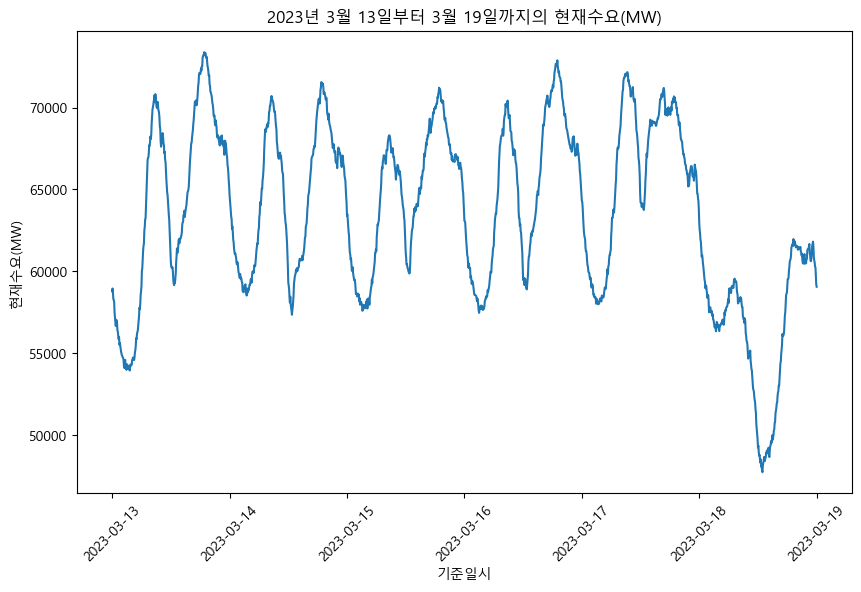

In [121]:
# 필요한 기간의 데이터 추출
start_date = pd.to_datetime('2023-03-13')
end_date = pd.to_datetime('2023-03-19')
filtered_df = df_cd_merge[(df_cd_merge['기준일시'] >= start_date) & (df_cd_merge['기준일시'] <= end_date)]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['기준일시'], filtered_df['현재수요(MW)'])
plt.xlabel('기준일시')
plt.ylabel('현재수요(MW)')
plt.title('2023년 3월 13일부터 3월 19일까지의 현재수요(MW)')
plt.xticks(rotation=45)
plt.show()

In [128]:
merged_df

,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),현재수요(MW)
2018-01-02 00:00:00,-1.549367,-0.453526,-0.746092,-0.199085,1.394867,-0.718860,-0.687705,-0.354880,-1.630106,-1.456163,60769.40
2018-01-02 00:05:00,-1.552596,-0.453526,-0.764247,-0.190828,1.394631,-0.719506,-0.687703,-0.342775,-1.630947,-1.458686,60556.60
2018-01-02 00:10:00,-1.555825,-0.453526,-0.782402,-0.182572,1.394394,-0.720153,-0.687702,-0.330670,-1.631789,-1.461210,60158.70
2018-01-02 00:15:00,-1.559054,-0.453526,-0.800556,-0.174316,1.394157,-0.720799,-0.687700,-0.318565,-1.632630,-1.463734,59842.30
2018-01-02 00:20:00,-1.562284,-0.453526,-0.818711,-0.166060,1.393920,-0.721445,-0.687698,-0.306460,-1.633471,-1.466257,59771.70
...,...,...,...,...,...,...,...,...,...,...,...
2023-03-12 22:40:00,-1.060224,-0.307616,3.361413,-1.189414,0.732581,-0.663283,-0.664452,-0.408906,-0.008481,-1.102214,60707.96
2023-03-12 22:45:00,-1.066894,-0.307616,3.354571,-1.201229,0.737939,-0.663283,-0.664452,-0.408779,0.001162,-1.107203,60673.42
2023-03-12 22:50:00,-1.073563,-0.307616,3.347729,-1.213045,0.743296,-0.663283,-0.664452,-0.408652,0.010805,-1.112192,60694.90
2023-03-12 22:55:00,-1.080233,-0.307616,3.340886,-1.224860,0.748653,-0.663283,-0.664452,-0.408524,0.020448,-1.117181,60442.74


In [126]:
merged_df.to_csv('train.csv')

In [132]:
a = pd.read_csv('train.csv')
a

,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),현재수요(MW)
0,2018-01-02 00:00:00,-1.549367,-0.453526,-0.746092,-0.199085,1.394867,-0.718860,-0.687705,-0.354880,-1.630106,-1.456163,60769.40
1,2018-01-02 00:05:00,-1.552596,-0.453526,-0.764247,-0.190828,1.394631,-0.719506,-0.687703,-0.342775,-1.630947,-1.458686,60556.60
2,2018-01-02 00:10:00,-1.555825,-0.453526,-0.782402,-0.182572,1.394394,-0.720153,-0.687702,-0.330670,-1.631789,-1.461210,60158.70
3,2018-01-02 00:15:00,-1.559054,-0.453526,-0.800556,-0.174316,1.394157,-0.720799,-0.687700,-0.318565,-1.632630,-1.463734,59842.30
4,2018-01-02 00:20:00,-1.562284,-0.453526,-0.818711,-0.166060,1.393920,-0.721445,-0.687698,-0.306460,-1.633471,-1.466257,59771.70
...,...,...,...,...,...,...,...,...,...,...,...,...
545489,2023-03-12 22:40:00,-1.060224,-0.307616,3.361413,-1.189414,0.732581,-0.663283,-0.664452,-0.408906,-0.008481,-1.102214,60707.96
545490,2023-03-12 22:45:00,-1.066894,-0.307616,3.354571,-1.201229,0.737939,-0.663283,-0.664452,-0.408779,0.001162,-1.107203,60673.42
545491,2023-03-12 22:50:00,-1.073563,-0.307616,3.347729,-1.213045,0.743296,-0.663283,-0.664452,-0.408652,0.010805,-1.112192,60694.90
545492,2023-03-12 22:55:00,-1.080233,-0.307616,3.340886,-1.224860,0.748653,-0.663283,-0.664452,-0.408524,0.020448,-1.117181,60442.74


In [133]:
a.isnull().sum()

일시           0
기온(°C)       0
강수량(mm)      0
풍속(m/s)      0
습도(%)        0
현지기압(hPa)    0
일조(hr)       0
일사(MJ/m2)    0
적설(cm)       0
전운량(10분위)    0
지면온도(°C)     0
현재수요(MW)     0
dtype: int64

In [140]:
a.iloc[9238:9244]

,일시,기온(°C),강수량(mm),풍속(m/s),습도(%),현지기압(hPa),일조(hr),일사(MJ/m2),적설(cm),전운량(10분위),지면온도(°C),현재수요(MW)
9238,2018-02-03 02:20:00,-1.747656,-0.239589,0.000163,-0.205017,1.116103,-0.760485,-0.679666,-0.207189,0.875049,-1.611537,66349.7
9239,2018-02-03 02:25:00,-1.747709,-0.233777,0.030177,-0.200419,1.116114,-0.760253,-0.679673,-0.218814,0.768214,-1.611784,66175.6
9240,2018-02-03 02:30:00,-1.747762,-0.227965,0.060192,-0.195822,1.116125,-0.760021,-0.679679,-0.230439,0.661379,-1.612032,65947.4
9241,2018-02-03 02:35:00,-1.747815,-0.222153,0.090206,-0.191224,1.116137,-0.759789,-0.679686,-0.242063,0.554544,-1.612279,65748.5
9242,2018-02-03 02:40:00,-1.747868,-0.216341,0.120220,-0.186626,1.116148,-0.759557,-0.679693,-0.253688,0.447709,-1.612526,65803.3
9243,2018-02-03 02:45:00,-1.747920,-0.210528,0.150235,-0.182029,1.116159,-0.759325,-0.679700,-0.265313,0.340874,-1.612773,65829.2


In [127]:
filtered_df.to_csv('actual_value.csv')

In [122]:
filtered_df

,기준일시,현재수요(MW)
1132721,2023-03-13 00:00:00,58782.03
1132722,2023-03-13 00:05:00,58954.44
1132723,2023-03-13 00:10:00,58710.58
1132724,2023-03-13 00:15:00,58298.44
1132725,2023-03-13 00:20:00,58263.70
...,...,...
1134445,2023-03-18 23:40:00,60279.80
1134446,2023-03-18 23:45:00,60260.97
1134447,2023-03-18 23:50:00,59782.49
1134448,2023-03-18 23:55:00,59179.57


# 랜덤포레스트

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 실제 데이터
actual_data = filtered_df['현재수요(MW)']

# 예측 결과 데이터
predicted_data = prediction_df['예측현재수요(MW)']

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['기준일시'], actual_data, label='실제 현재수요(MW)')
plt.plot(prediction_df['일시'], predicted_data, label='예측 현재수요(MW)')
plt.xlabel('기준일시')
plt.ylabel('현재수요(MW)')
plt.title('실제 현재수요(MW)와 예측 현재수요(MW) 비교')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np

# MAPE 계산 함수
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

# MAPE 계산
mape = calculate_mape(actual_data, predicted_data)

print(f"MAPE: {mape:.2f}%")


In [120]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

# 필요한 가상정보와 전력수요 사이의 상관관계를 고려하여 입력 변수(X)와 출력 변수(y)로 분할
X = merged_df[['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '일조(hr)', '지면온도(°C)']]
y = merged_df['현재수요(MW)']

# 특정 기간 필터링
start_date = '2022-04-01'
end_date = '2023-03-12'
filtered_X = X[(X.index >= start_date) & (X.index <= end_date)]
filtered_y = y[(y.index >= start_date) & (y.index <= end_date)]

# 모델 선택 및 학습
model = RandomForestRegressor()
model.fit(filtered_X, filtered_y)

# 특정 기간의 데이터만 선택
start_date = '2023-03-13'
end_date = '2023-03-19'
filtered_X = X.loc[start_date:end_date]
filtered_y = y.loc[start_date:end_date]

# 테스트 데이터에 대한 예측
y_pred = model.predict(filtered_X)

# MAPE 계산
mape = mean_absolute_percentage_error(filtered_y, y_pred)

# 결과 출력
print("Mean Absolute Percentage Error (MAPE):", mape)

# 그래프로 실제값과 예측값 나타내기
plt.plot(filtered_y.index, filtered_y, label='실제값')
plt.plot(filtered_y.index, y_pred, label='예측값')
plt.xlabel('기준일시')
plt.ylabel('전력수요(MW)')
plt.title('전력수요량 {} to {}'.format(start_date, end_date))
plt.xticks(rotation=45)
plt.legend()
plt.show()


ValueError: Found array with 0 sample(s) (shape=(0, 6)) while a minimum of 1 is required by RandomForestRegressor.